In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
# importing the datasets

df = pd.read_csv("Datasets/Black Friday/train.csv")
dft = pd.read_csv("Datasets/Black Friday/test.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
dft.shape

(233599, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
df.drop(['User_ID'],axis = 1, inplace = True)

In [10]:
df.drop(['Product_ID'],axis = 1, inplace = True)

In [11]:
(df.isnull().sum()/len(df))*100

Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [12]:
#Checking for uniqueness

#Age
print("Age")
print("-" * 20)
print(df['Age'].value_counts())
print('\n')

#Gender
print("Gender")
print("-" * 20)
print(df['Gender'].value_counts())
print('\n')

#City_Category
print("City_Category")
print("-" * 20)
print(df['City_Category'].value_counts())
print('\n')


Age
--------------------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Gender
--------------------
M    414259
F    135809
Name: Gender, dtype: int64


City_Category
--------------------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64




In [13]:
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# Exploratory Data Analysis (EDA)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


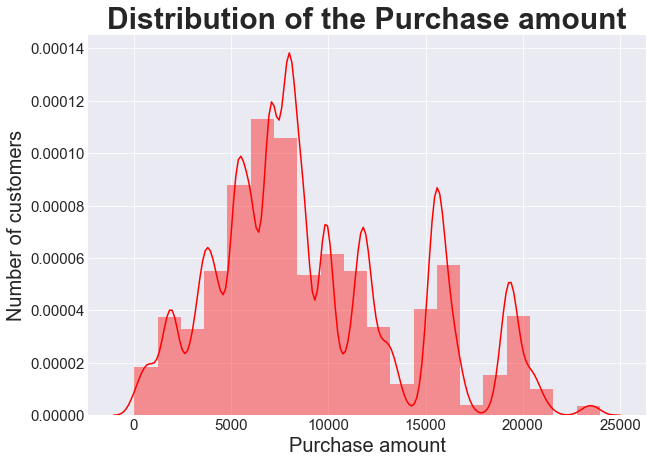

In [14]:
# Distribution of purchase amount
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,7))
sns.distplot(df['Purchase'], bins = 20,color = 'red')
plt.title('Distribution of the Purchase amount' , fontdict ={ 'fontsize' : 30 , 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict={'fontsize': 20})
plt.ylabel('Number of customers', fontdict = {'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

Thus, we observe that the purchase variable almost follows a Normal Distribution.

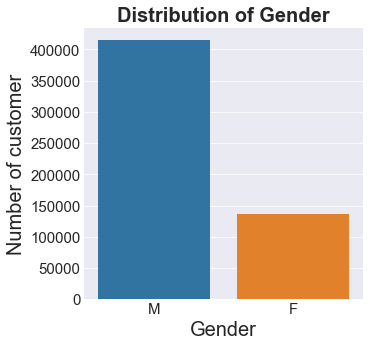

In [15]:
# Barplot for Gender
gender = df.Gender.value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (5,5))
sns.barplot(x = gender.index , y= gender.values)
plt.title('Distribution of Gender', fontdict = {'fontsize':20 , 'fontweight':'bold'})
plt.xlabel('Gender', fontdict = {'fontsize': 20})
plt.ylabel('Number of customer', fontdict = {'fontsize': 20})
plt.tick_params(labelsize = 15)
plt.show()


We can observe that the number of male customers are significantly higher than the female customers.

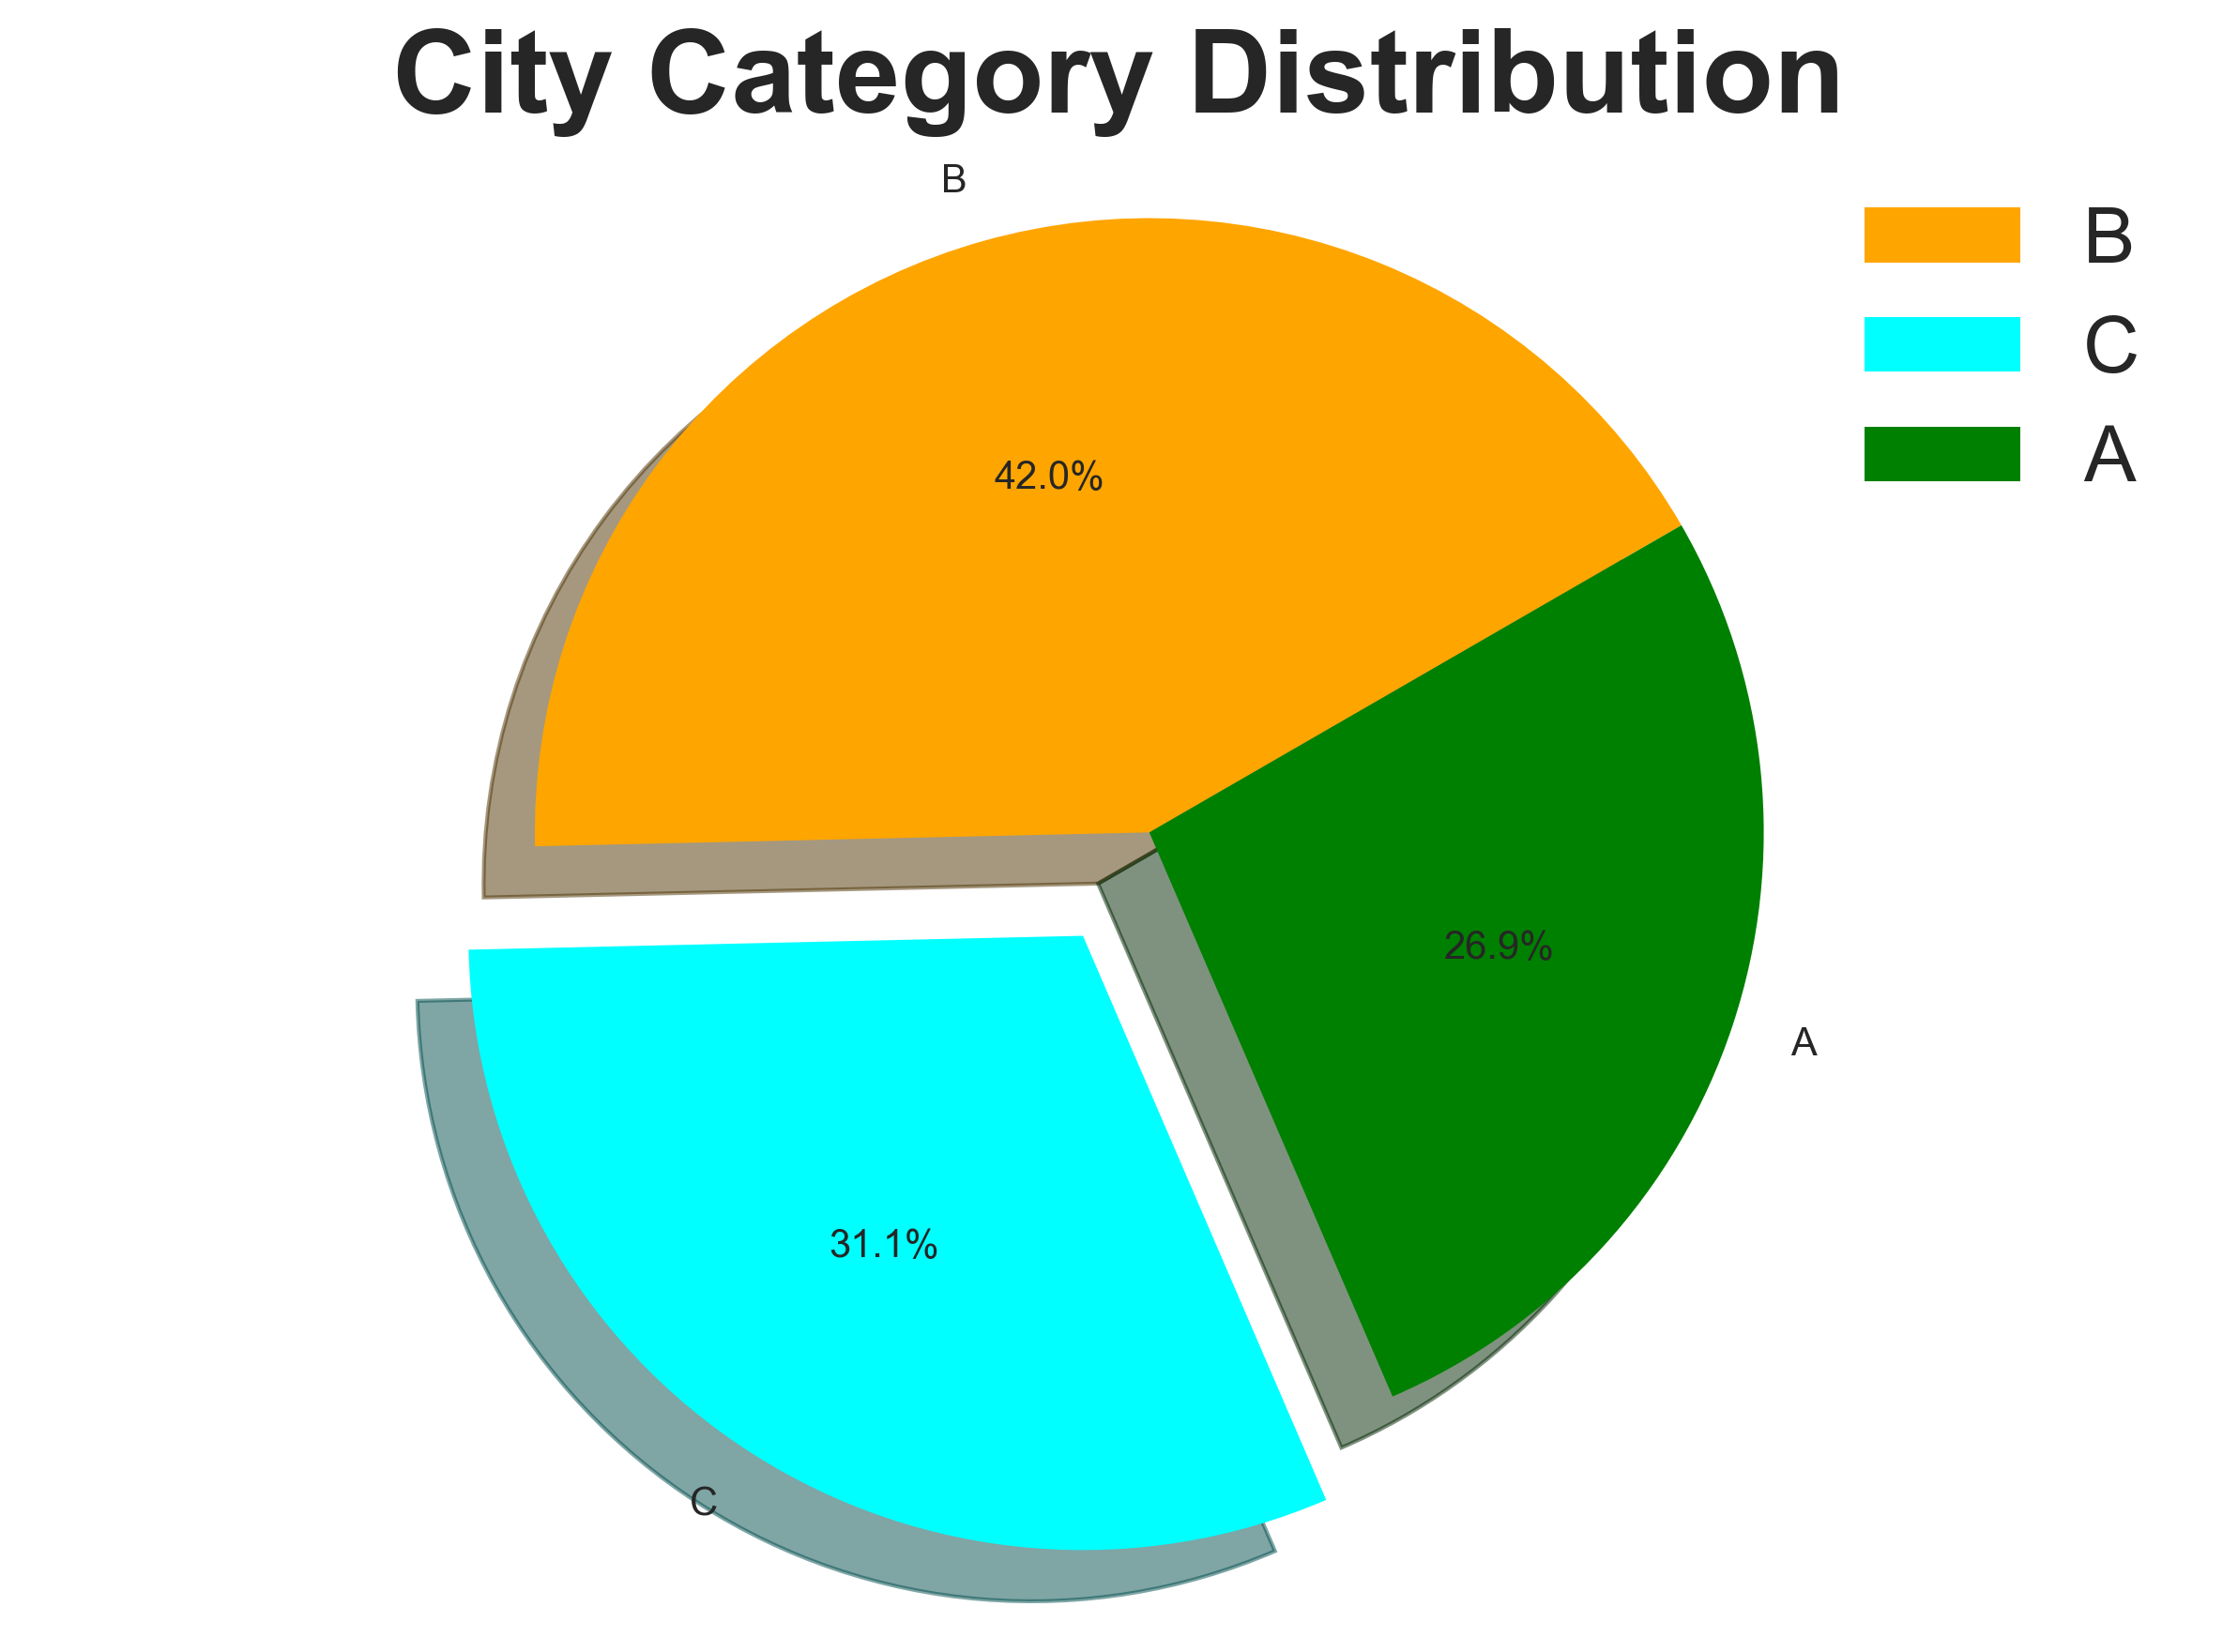

In [16]:
# Pie chart for the "City Category"
city = df.City_Category.value_counts()
    
plt.figure(figsize = (10,7), dpi = 300)
color = ['orange','cyan','green'] 
plt.pie(city.values , labels = city.index, startangle = 30, explode = (0,0.20,0), shadow = True , autopct = '%1.1f%%' , colors = color)
plt.title('City Category Distribution' , fontdict = {'fontsize':30 , 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

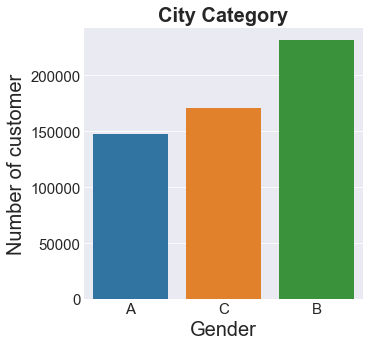

In [17]:
plt.figure(figsize = (5,5))
sns.countplot(x = df.City_Category)
plt.title('City Category', fontdict = {'fontsize':20 , 'fontweight':'bold'})
plt.xlabel('Gender', fontdict = {'fontsize': 20})
plt.ylabel('Number of customer', fontdict = {'fontsize': 20})
plt.tick_params(labelsize = 15)
plt.show()

We can observe that about 42% customers belong to the city of category B followed by category C and A with share of 31.1% and 29.9% respectively.

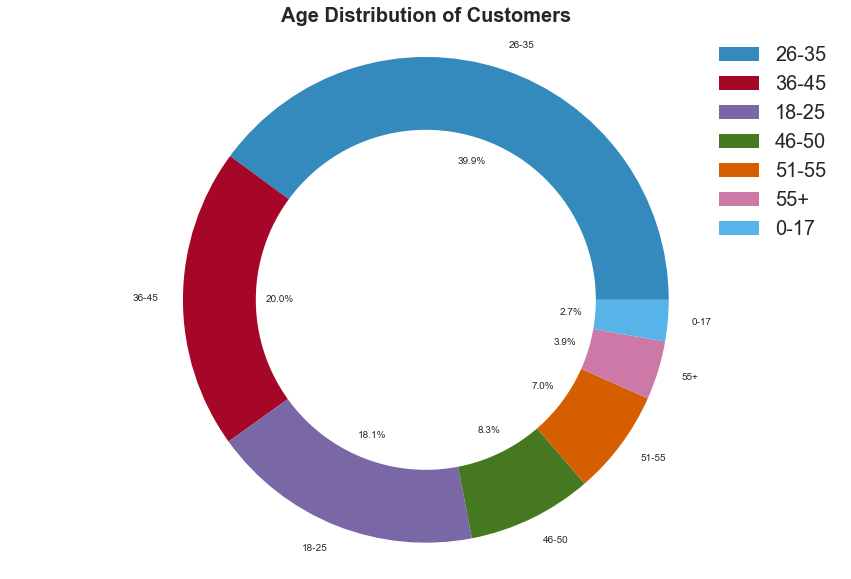

In [18]:
# A donut chart for 'Age'
age = df.Age.value_counts()
plt.style.use('bmh')
plt.figure(figsize = (15,10))
plt.pie(age.values, labels = age.index, autopct = '%1.1f%%')
centre_circle = plt.Circle((0,0),0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age Distribution of Customers' , fontdict = {'fontsize' : 20 , 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size': 20})
plt.show()

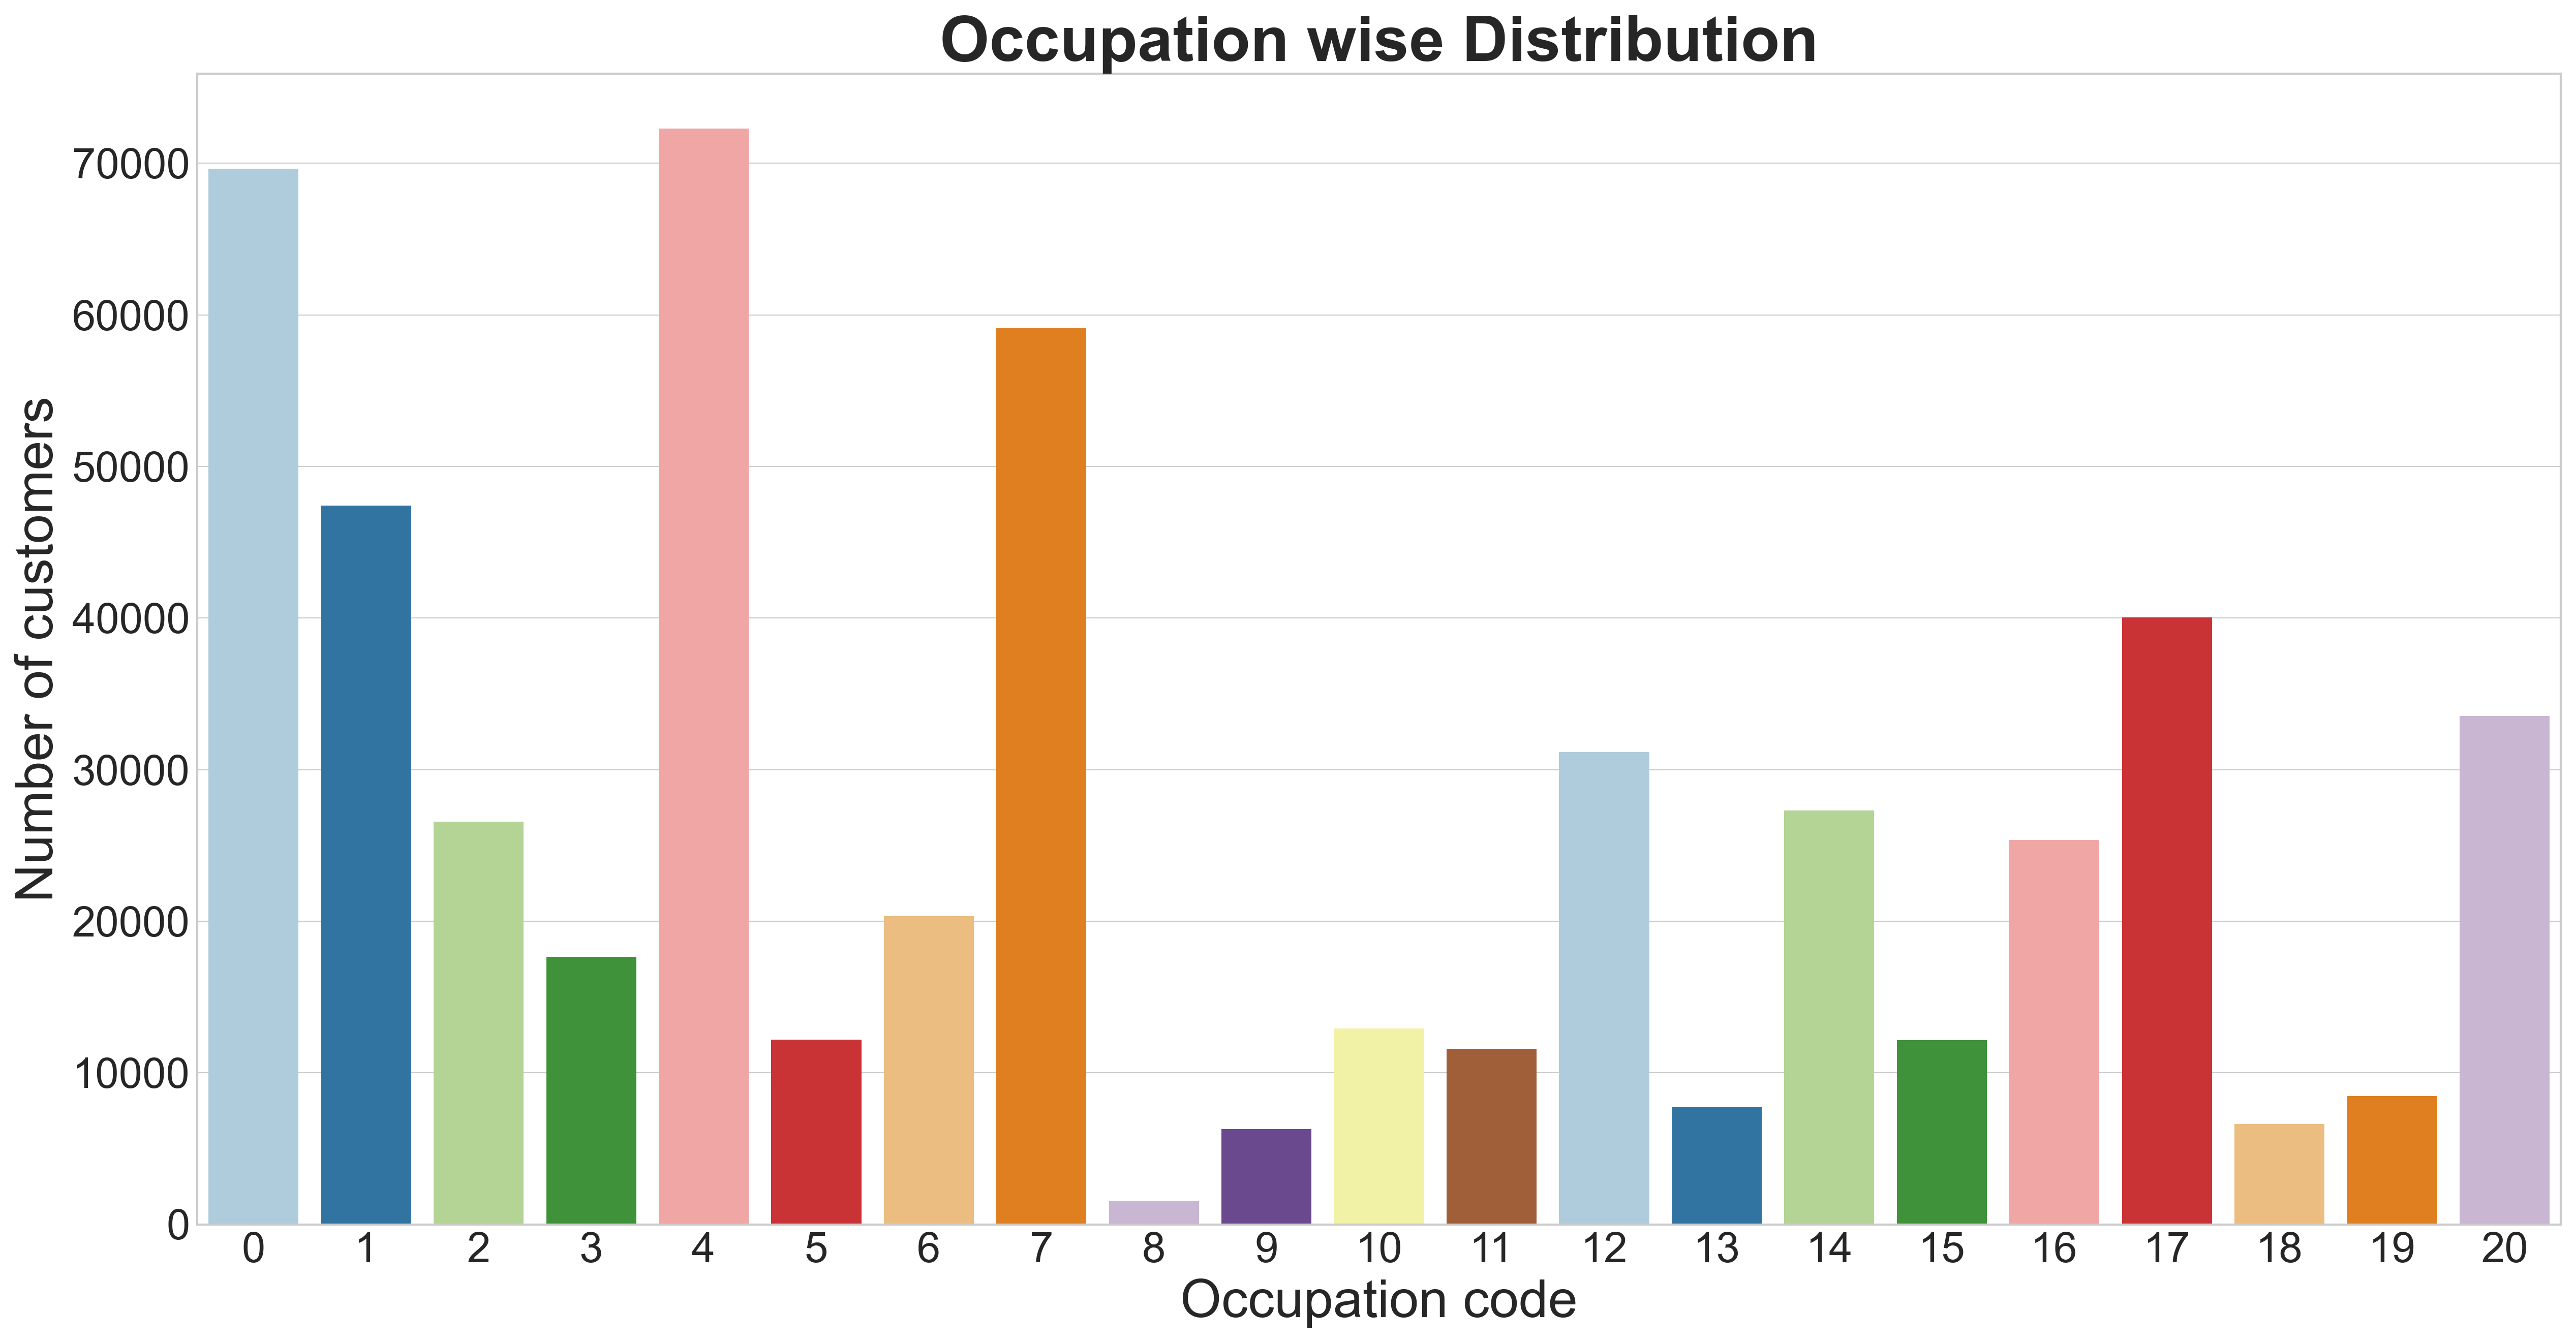

In [19]:
# Barplot for the variable Occupation

occupation = df.Occupation.value_counts()

plt.figure(figsize=(20,10), dpi = 300)
plt.style.use('seaborn-whitegrid')
sns.barplot(x = occupation.index, y = occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontsize' : 25})
plt.ylabel('Number of customers', fontdict = {'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

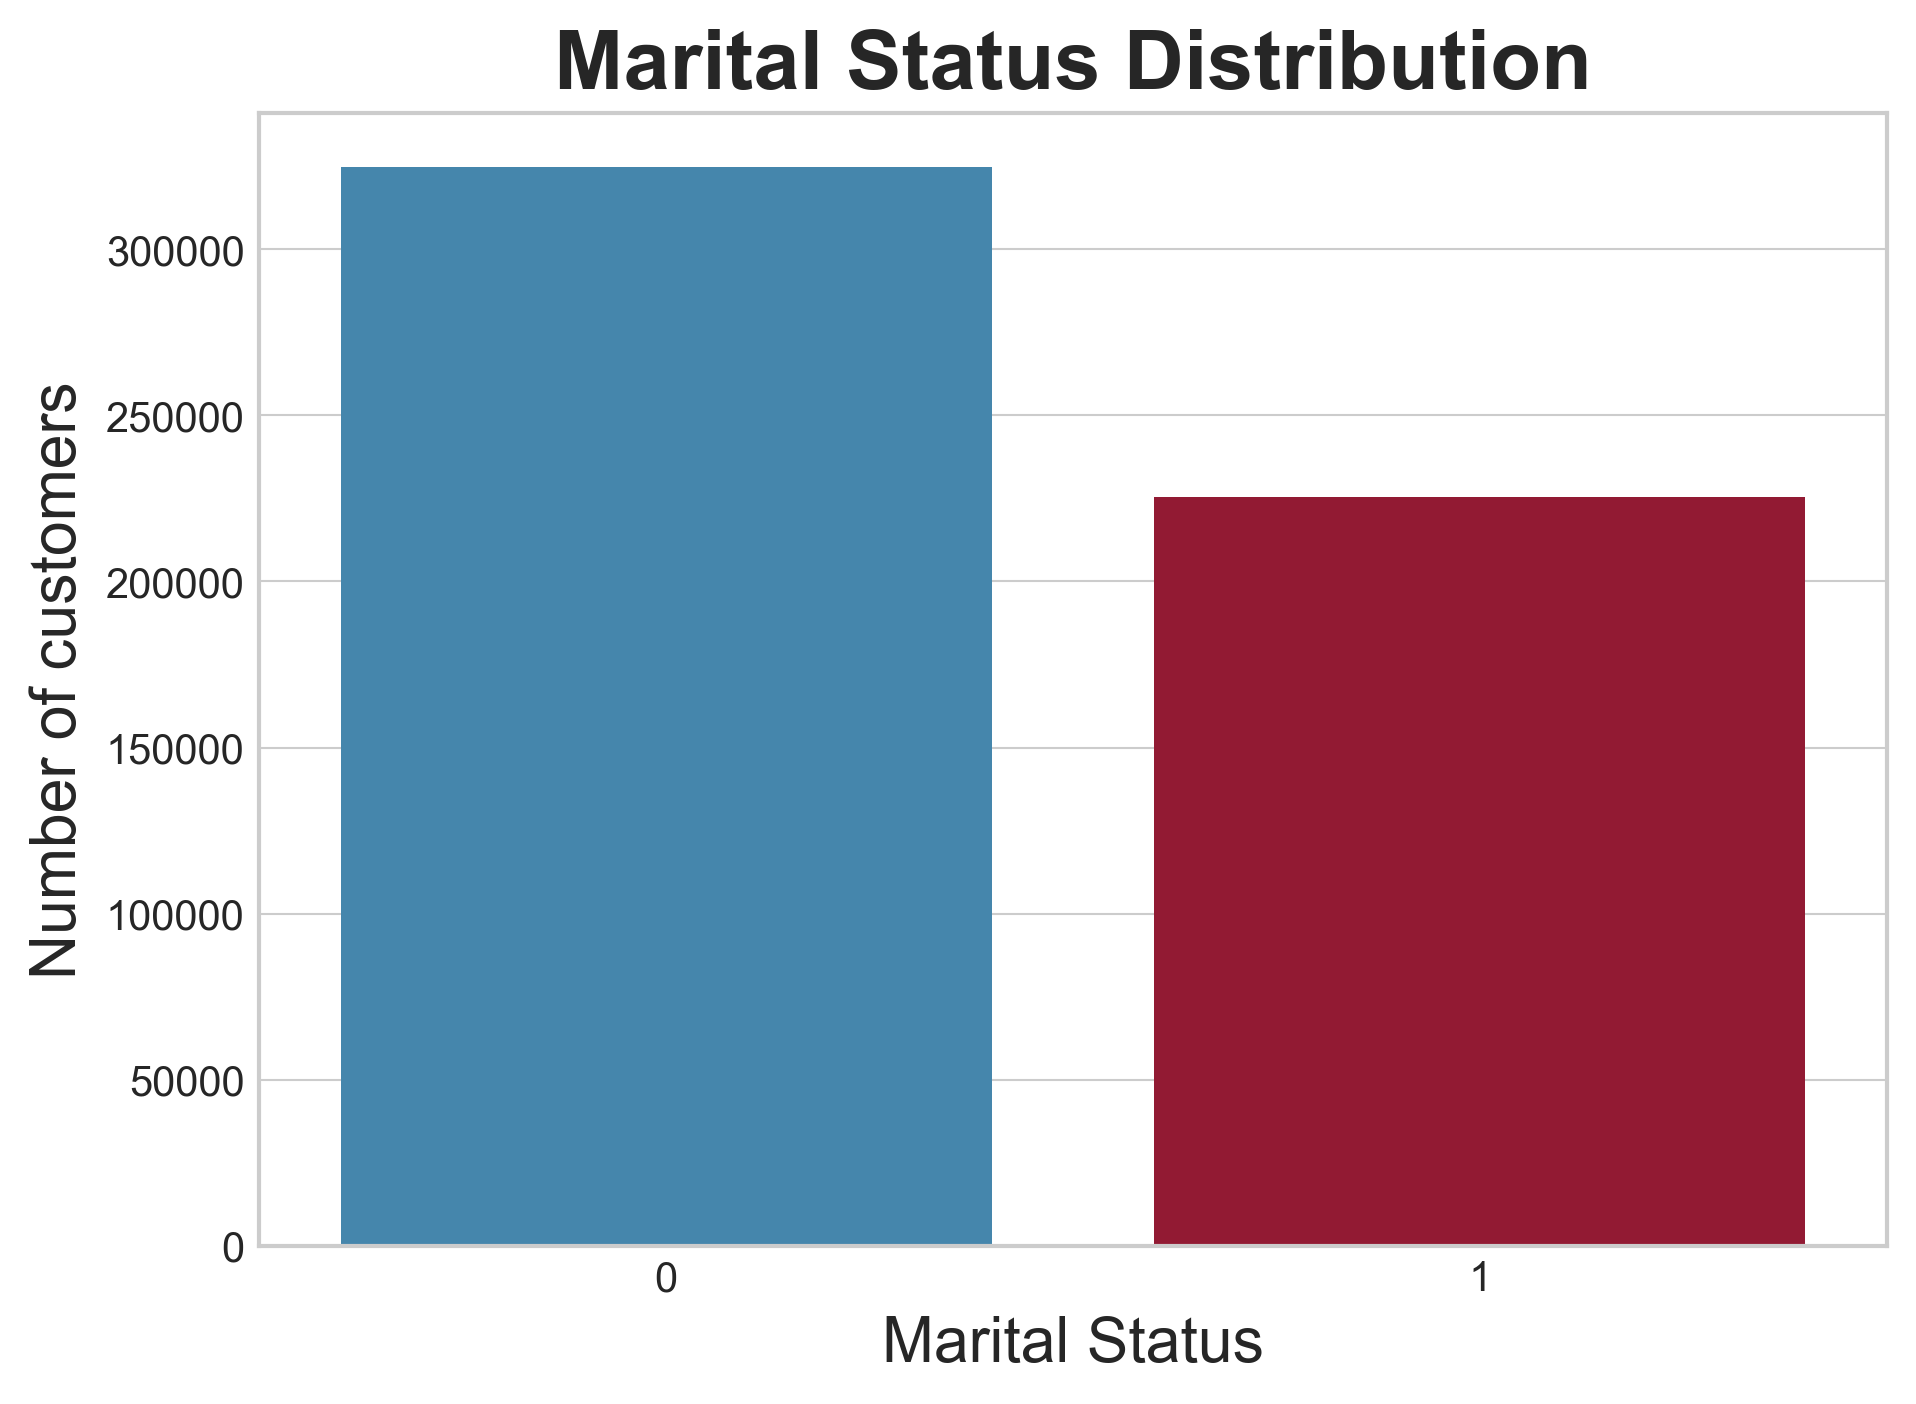

In [20]:
# Distribution of the variable Marital Status

plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (7, 5) , dpi =300)
sns.countplot(x =df['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontsize' : 15})
plt.ylabel('Number of customers', fontdict = {'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

We observe that strength of the non married customer is higher than that of the married customers.

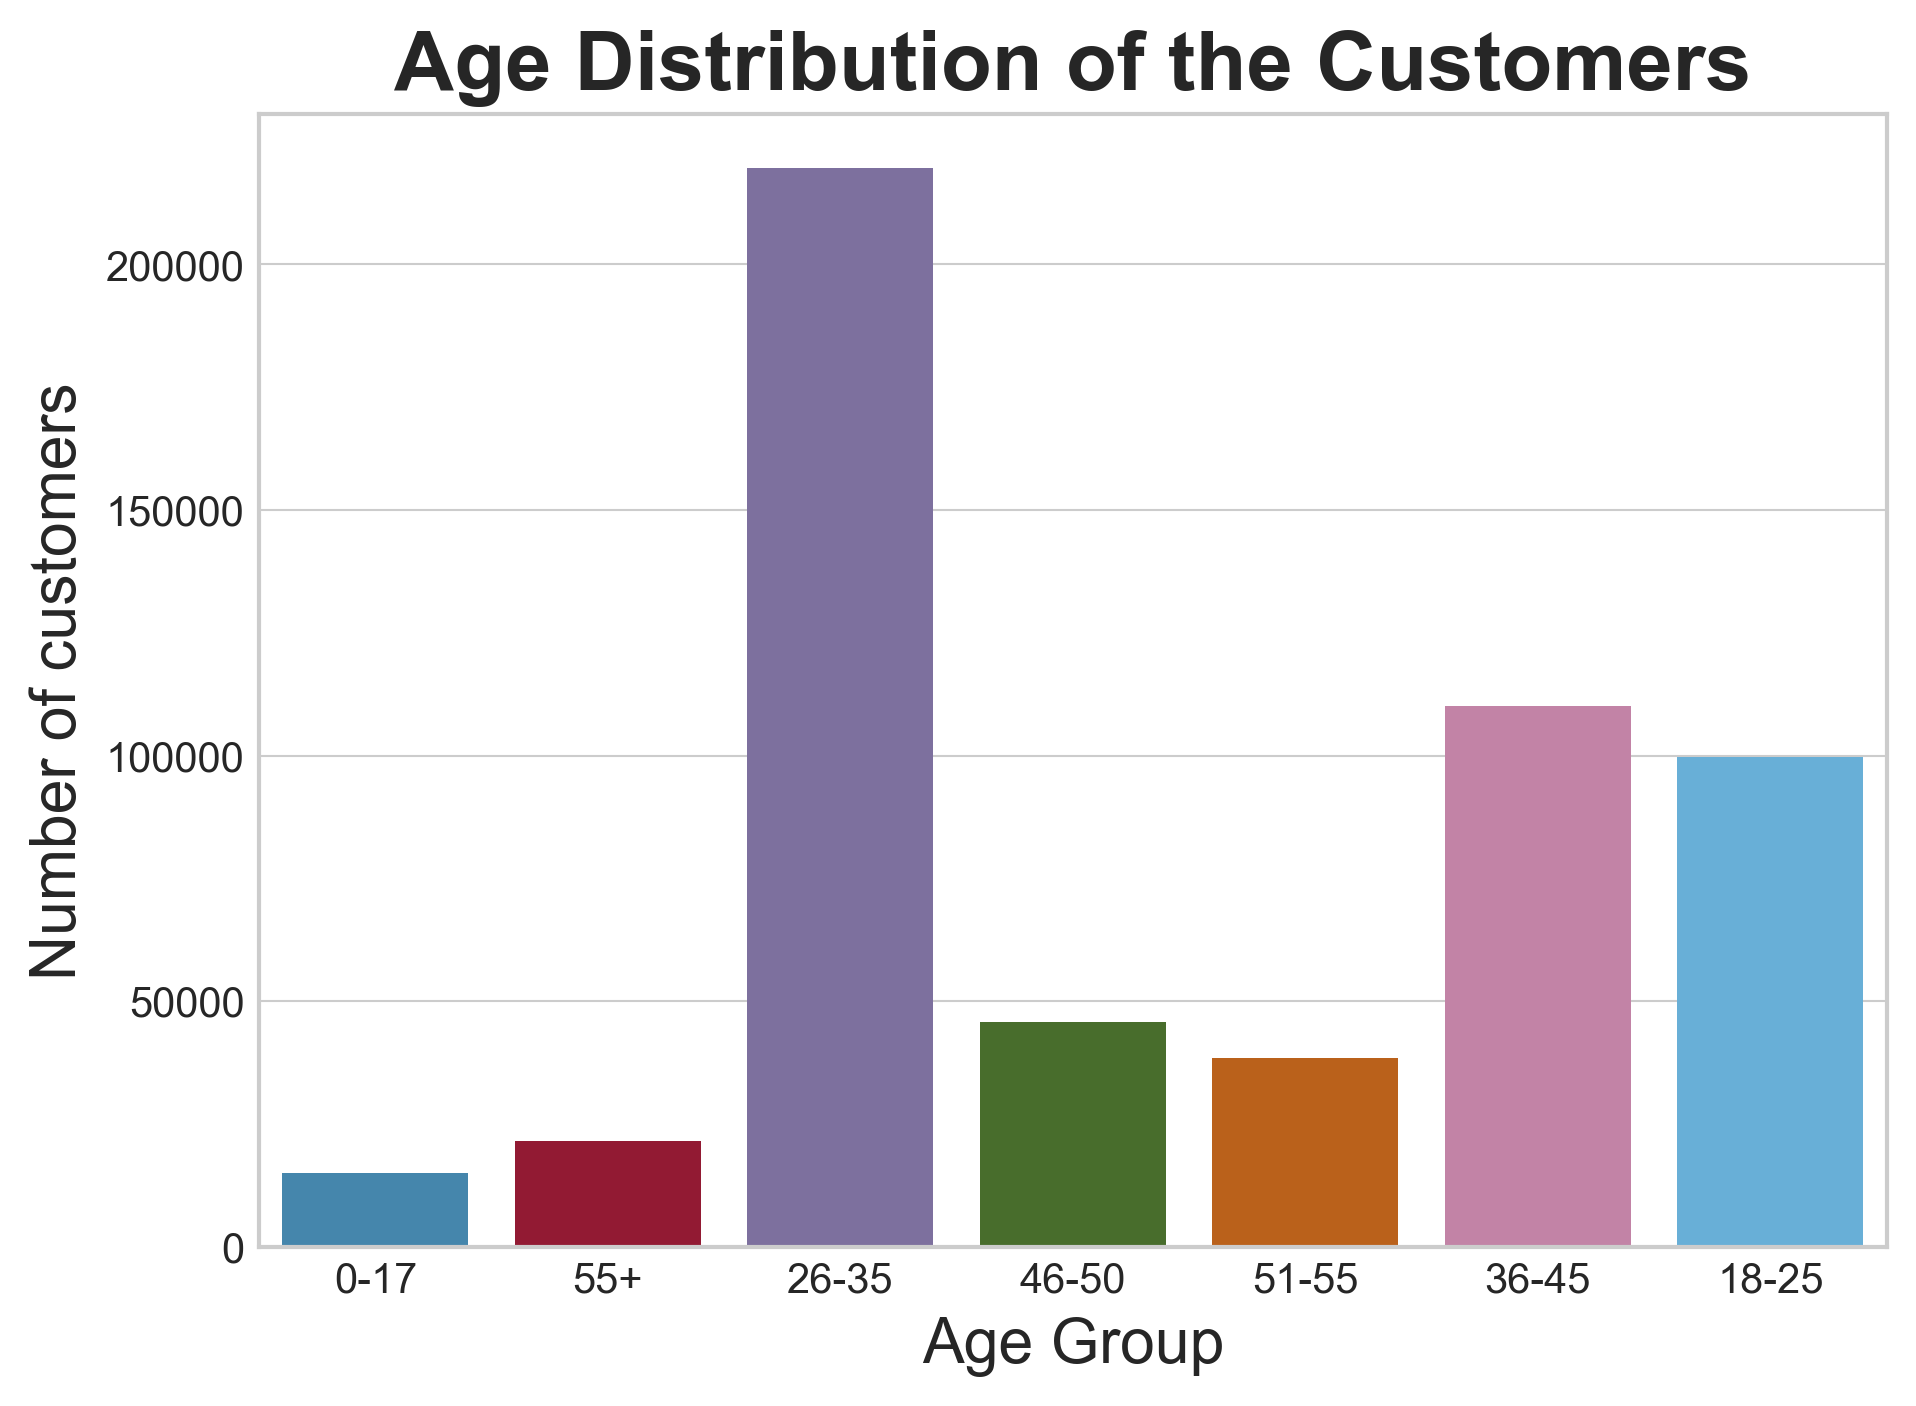

In [21]:
# Countplot of the variable Age.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (7, 5) , dpi =300)
sns.countplot(x =df['Age'])
plt.title('Age Distribution of the Customers', fontdict = {'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age Group', fontdict = {'fontsize' : 15})
plt.ylabel('Number of customers', fontdict = {'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

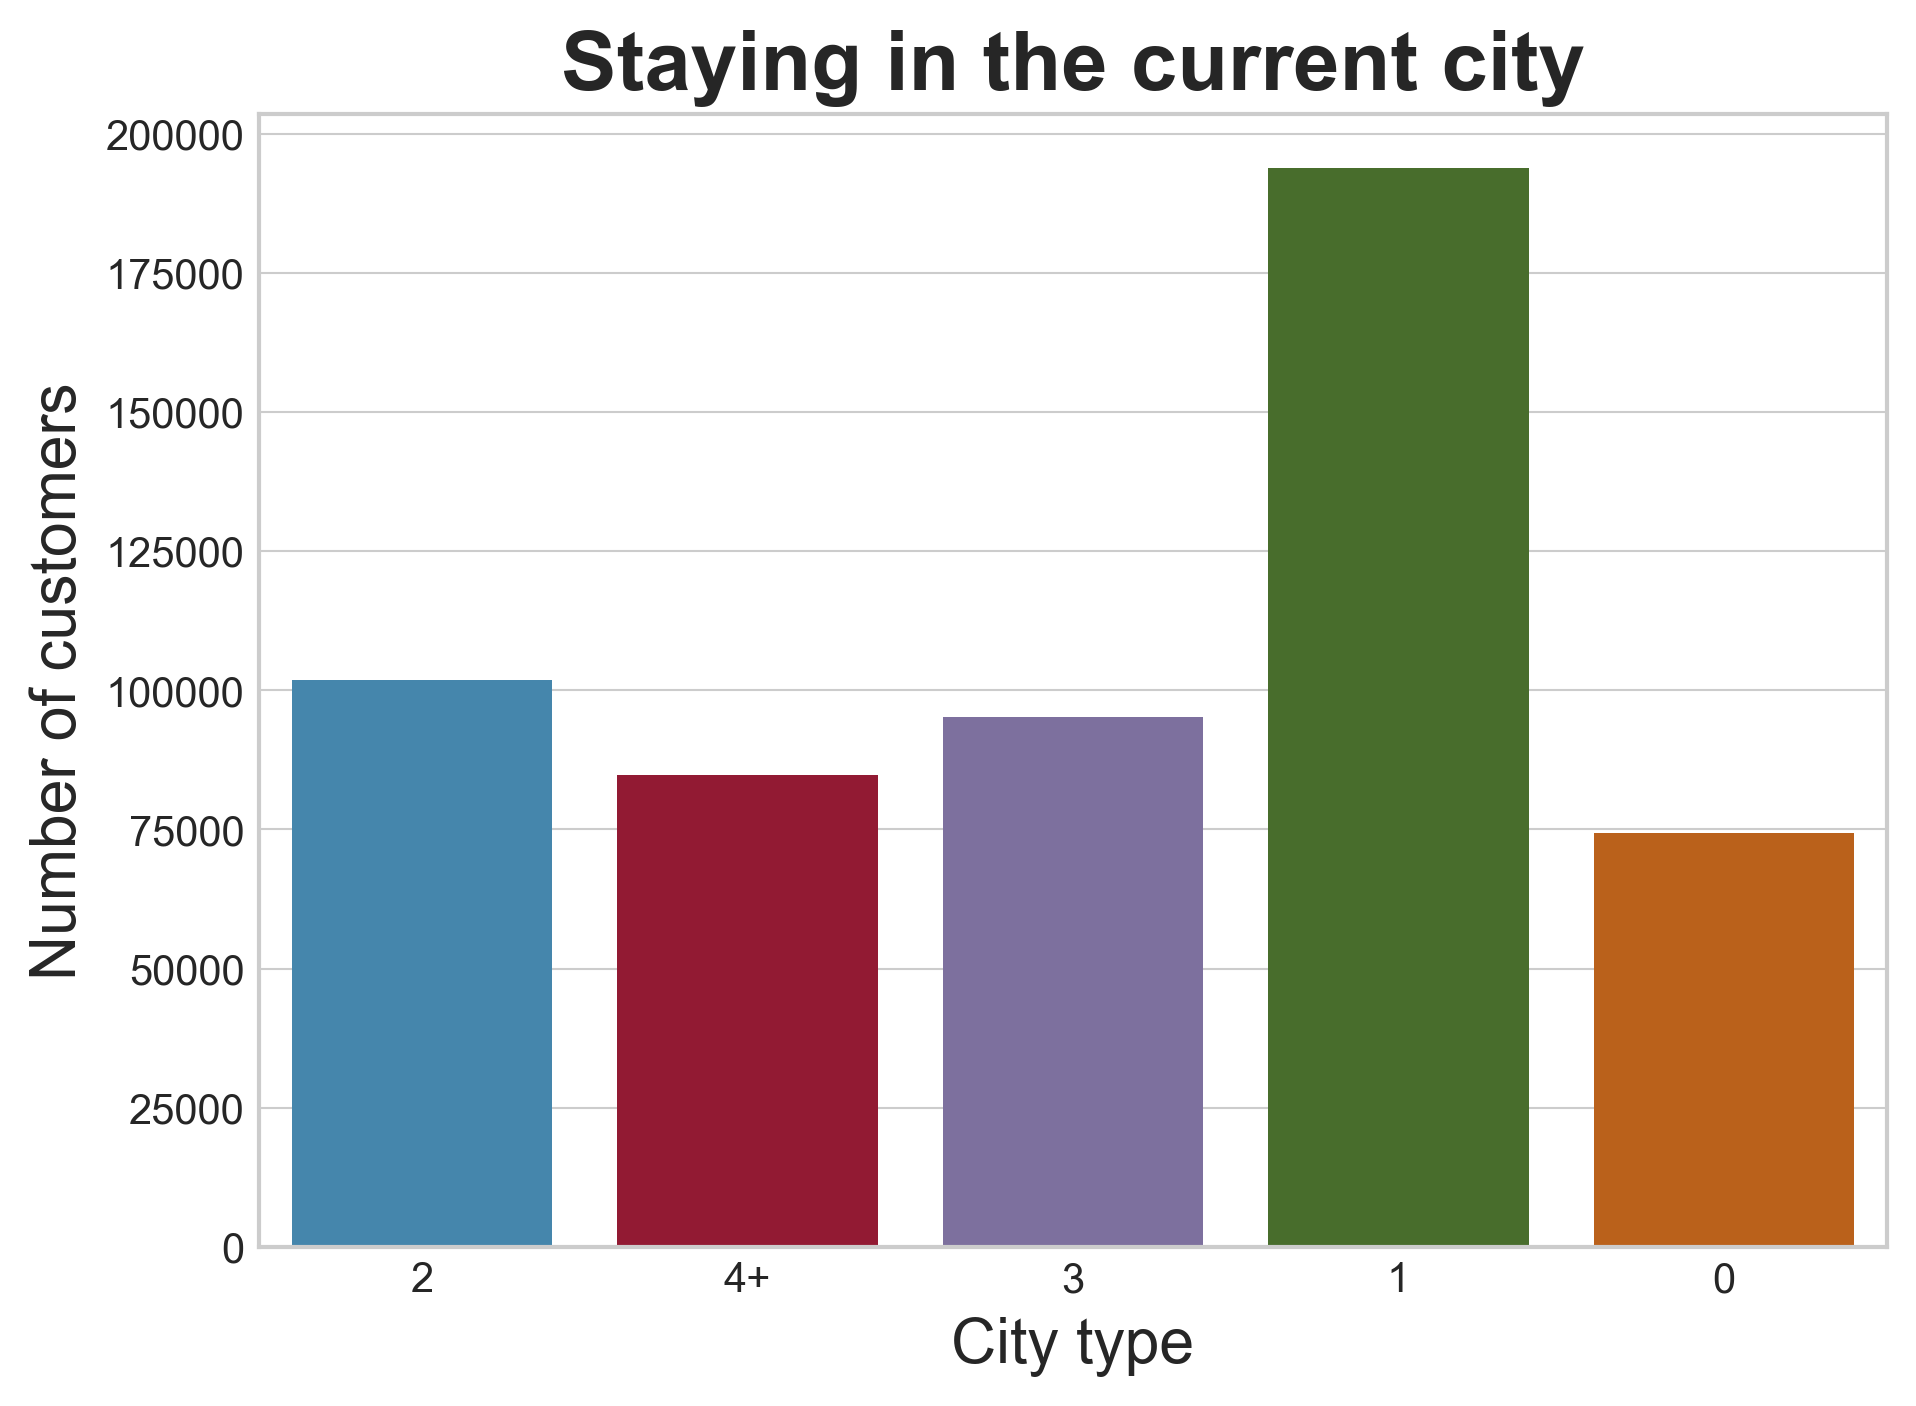

In [22]:
# Countplot of the variable Stay In Current City Years.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (7, 5) , dpi =300)
sns.countplot(x =df['Stay_In_Current_City_Years'])
plt.title('Staying in the current city', fontdict = {'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('City type', fontdict = {'fontsize' : 15})
plt.ylabel('Number of customers', fontdict = {'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

We observe that the longest someone is living in the city, less chance are there that they are to buy a lot of things. Generally, people who are new to the city have a tendency to buy many things.

We can observe that the biggest chunk of customers belong to the age group of 26 - 35 followed by 36 - 45 and 18 - 25.

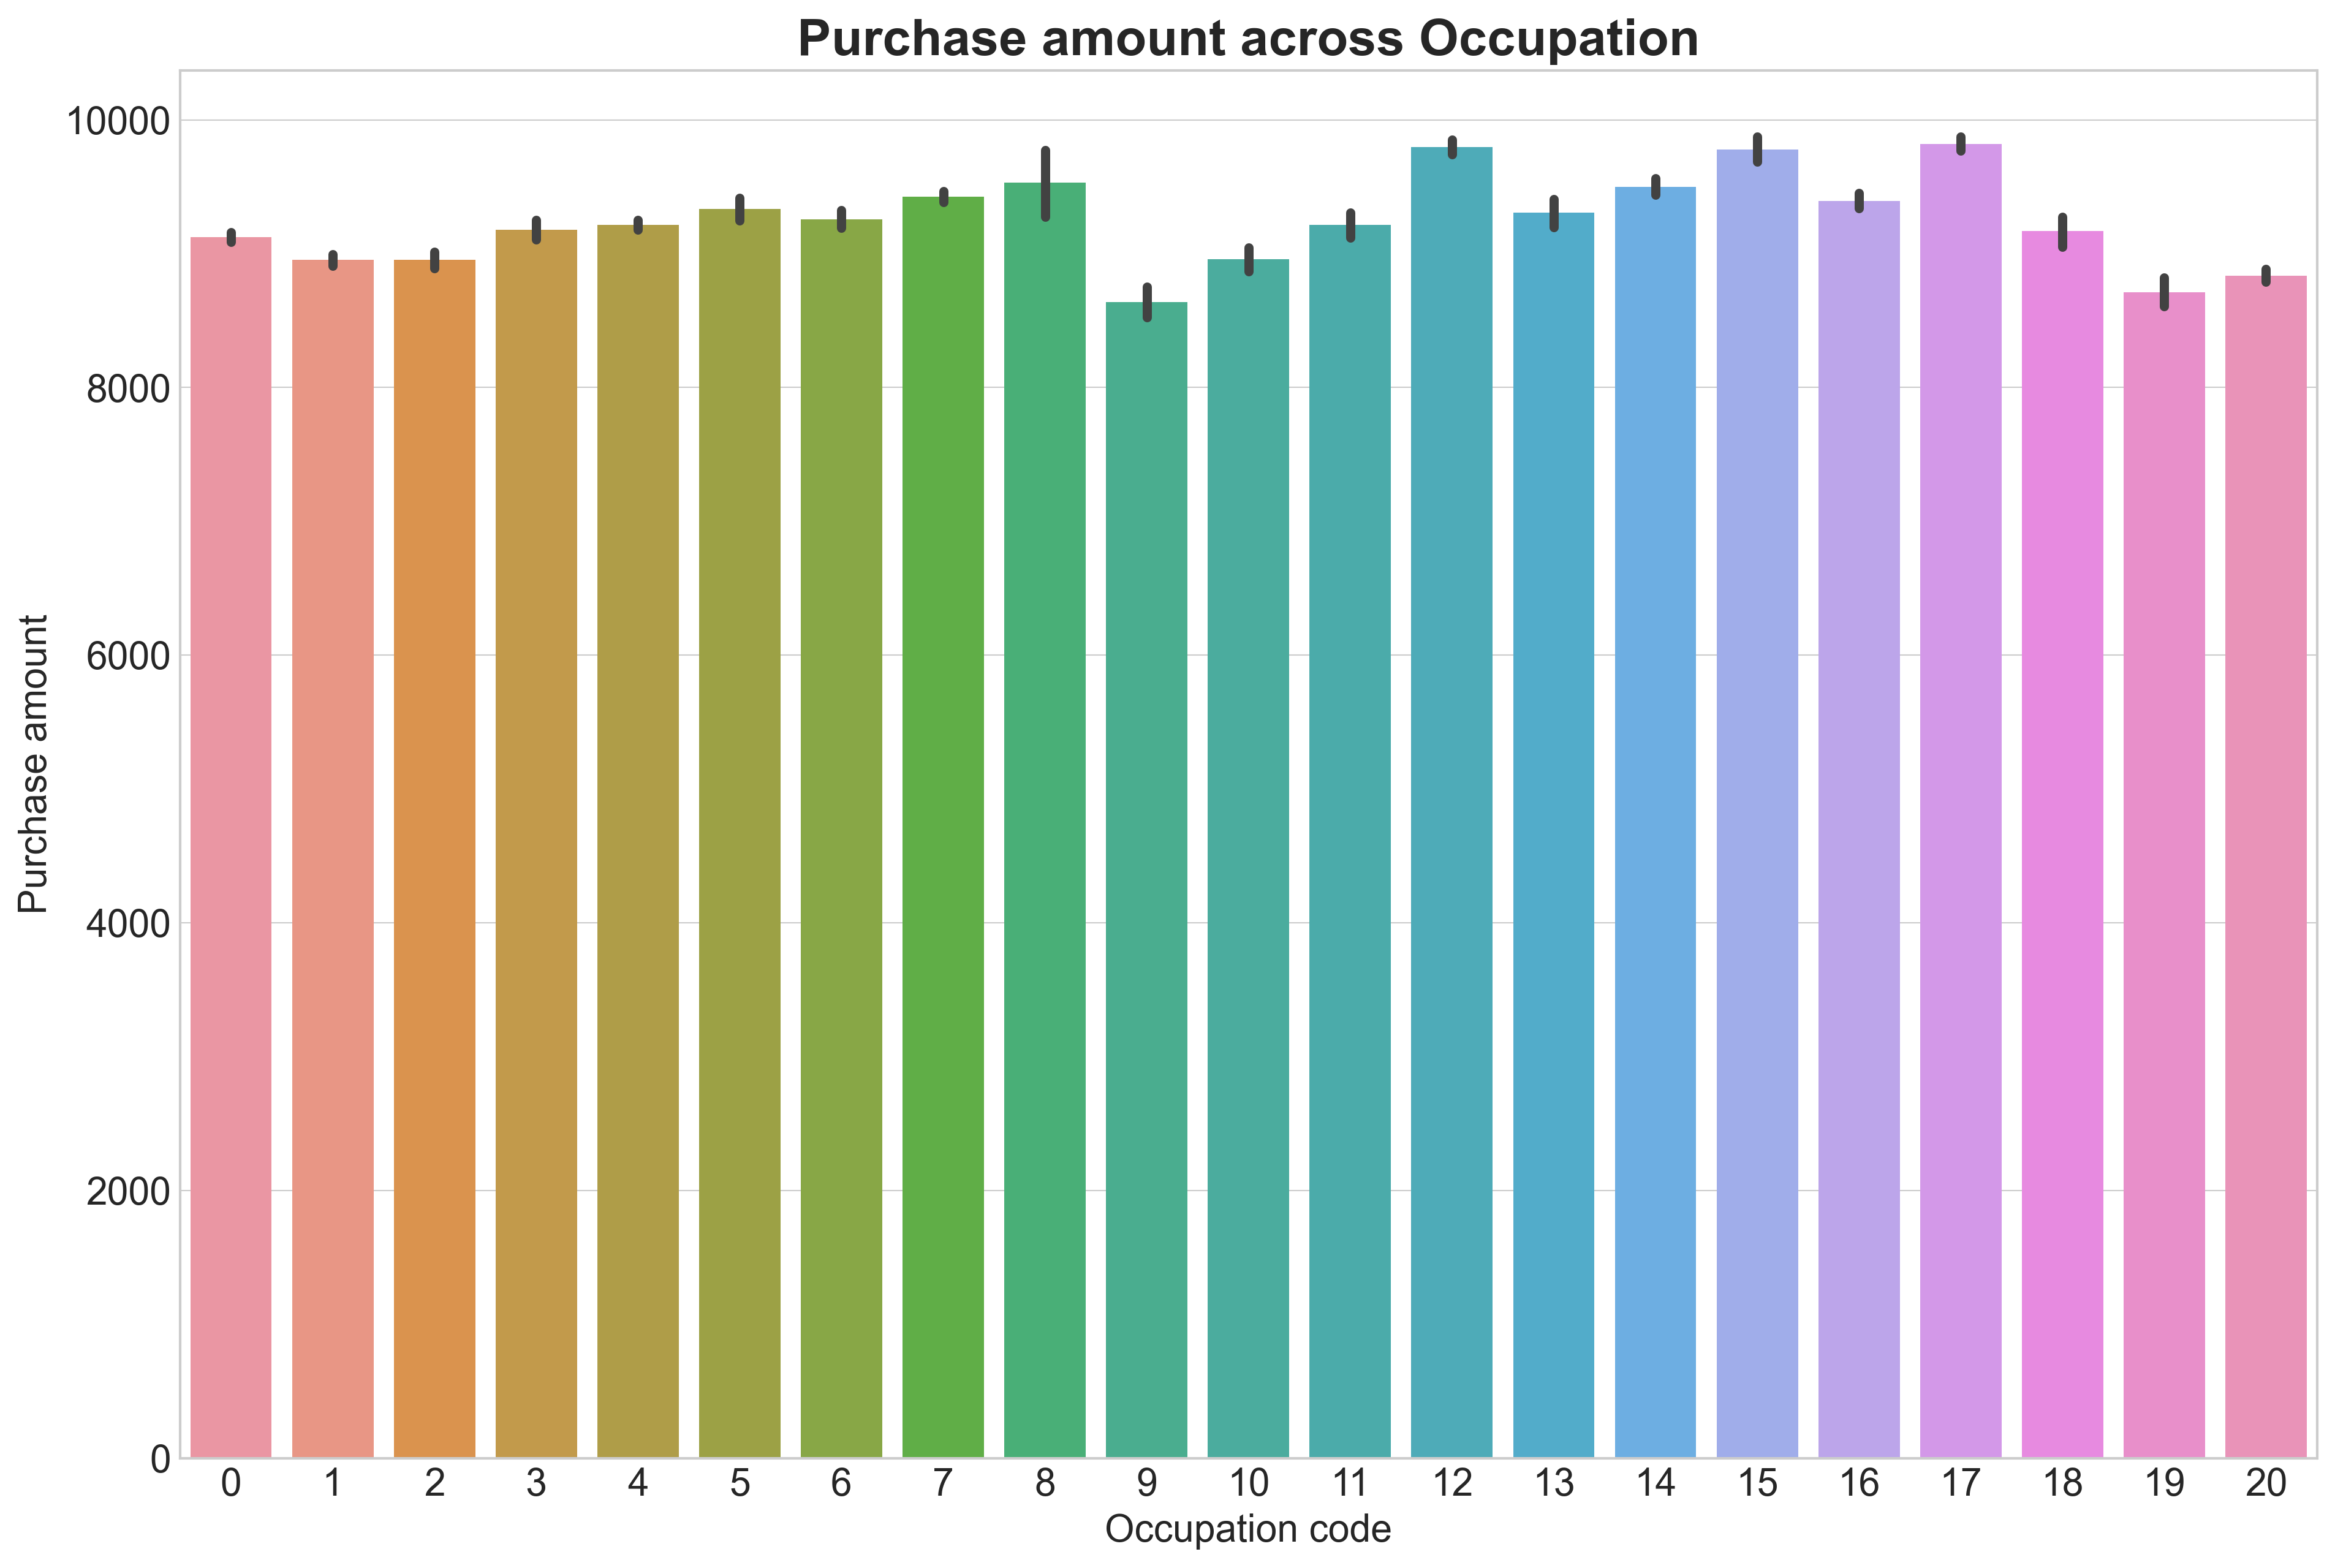

In [23]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (15, 10), dpi = 300)
plt.style.use('seaborn-whitegrid')
sns.barplot(x = df['Occupation'],  y =df['Purchase'])
plt.title('Purchase amount across Occupation', fontdict = {'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

We can observe that the customers tends to have made almost purchase amount irrespective of the Occupation they belong to.

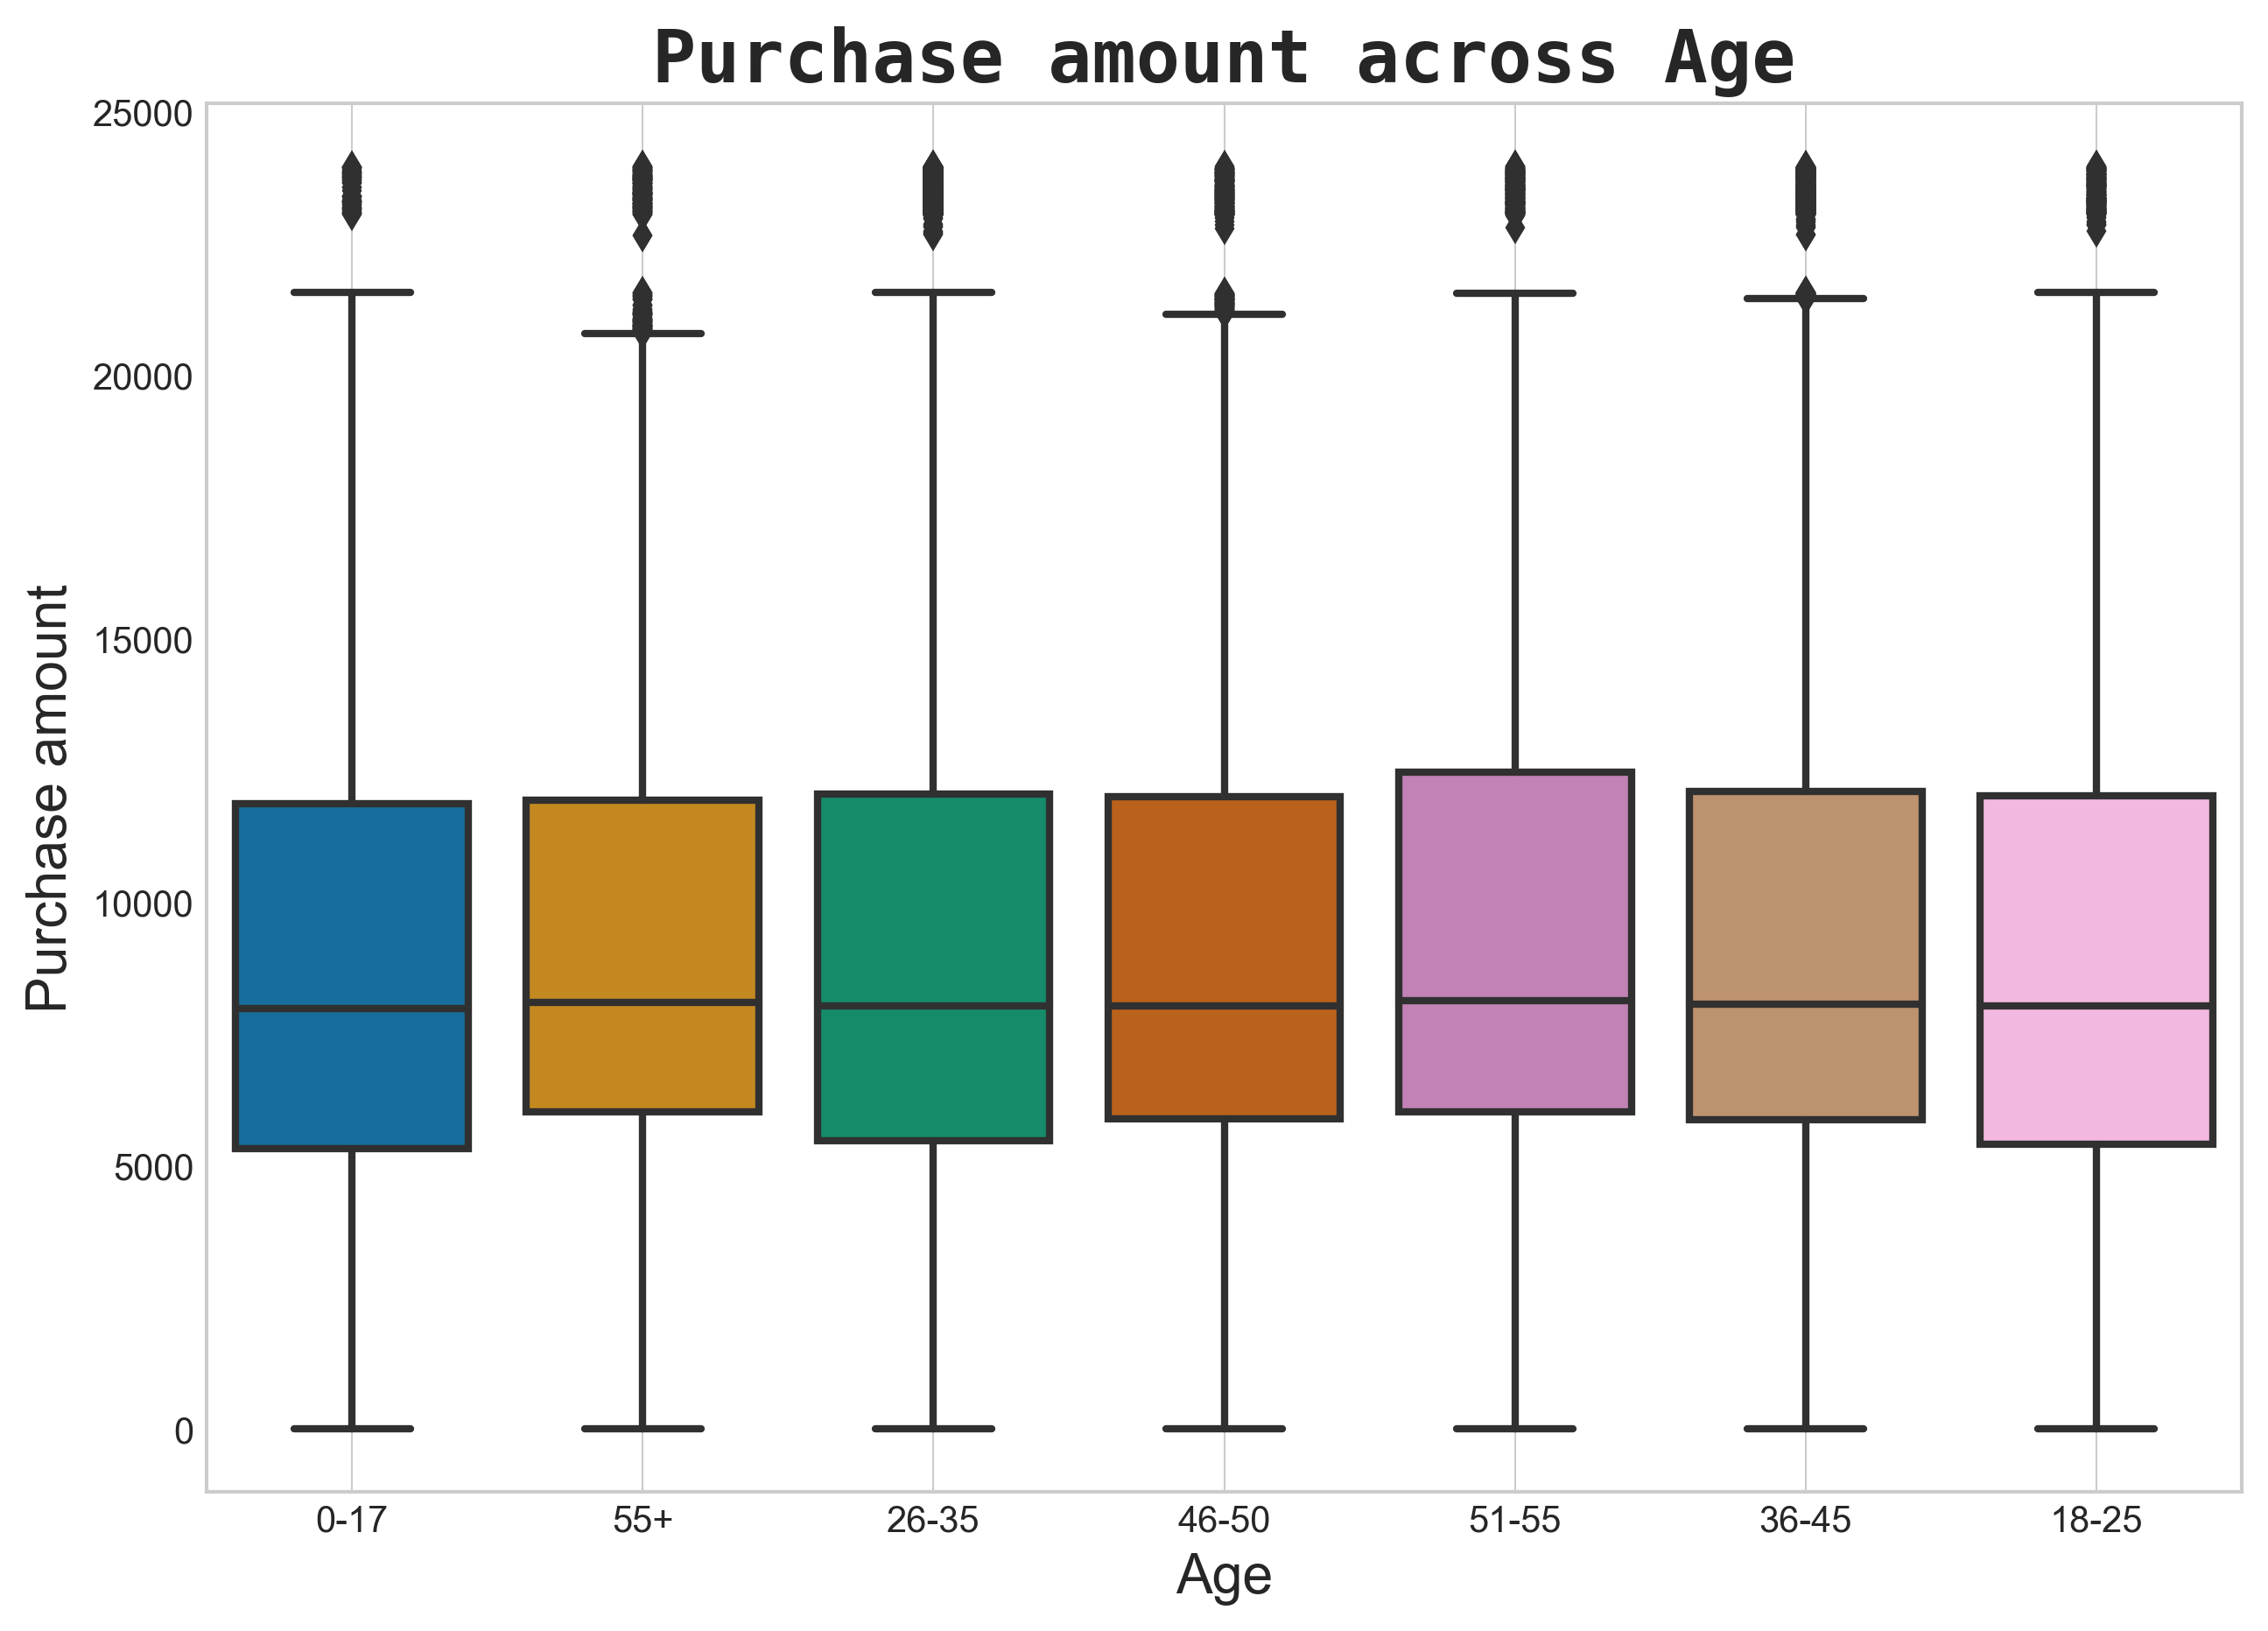

In [24]:
# Creating a boxplot of 'Age vs Purchase'
plt.figure(figsize = (10,7),dpi = 300)
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=df['Age'], y = df['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = { 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

We can observe that each age group have a similar purchase amount.

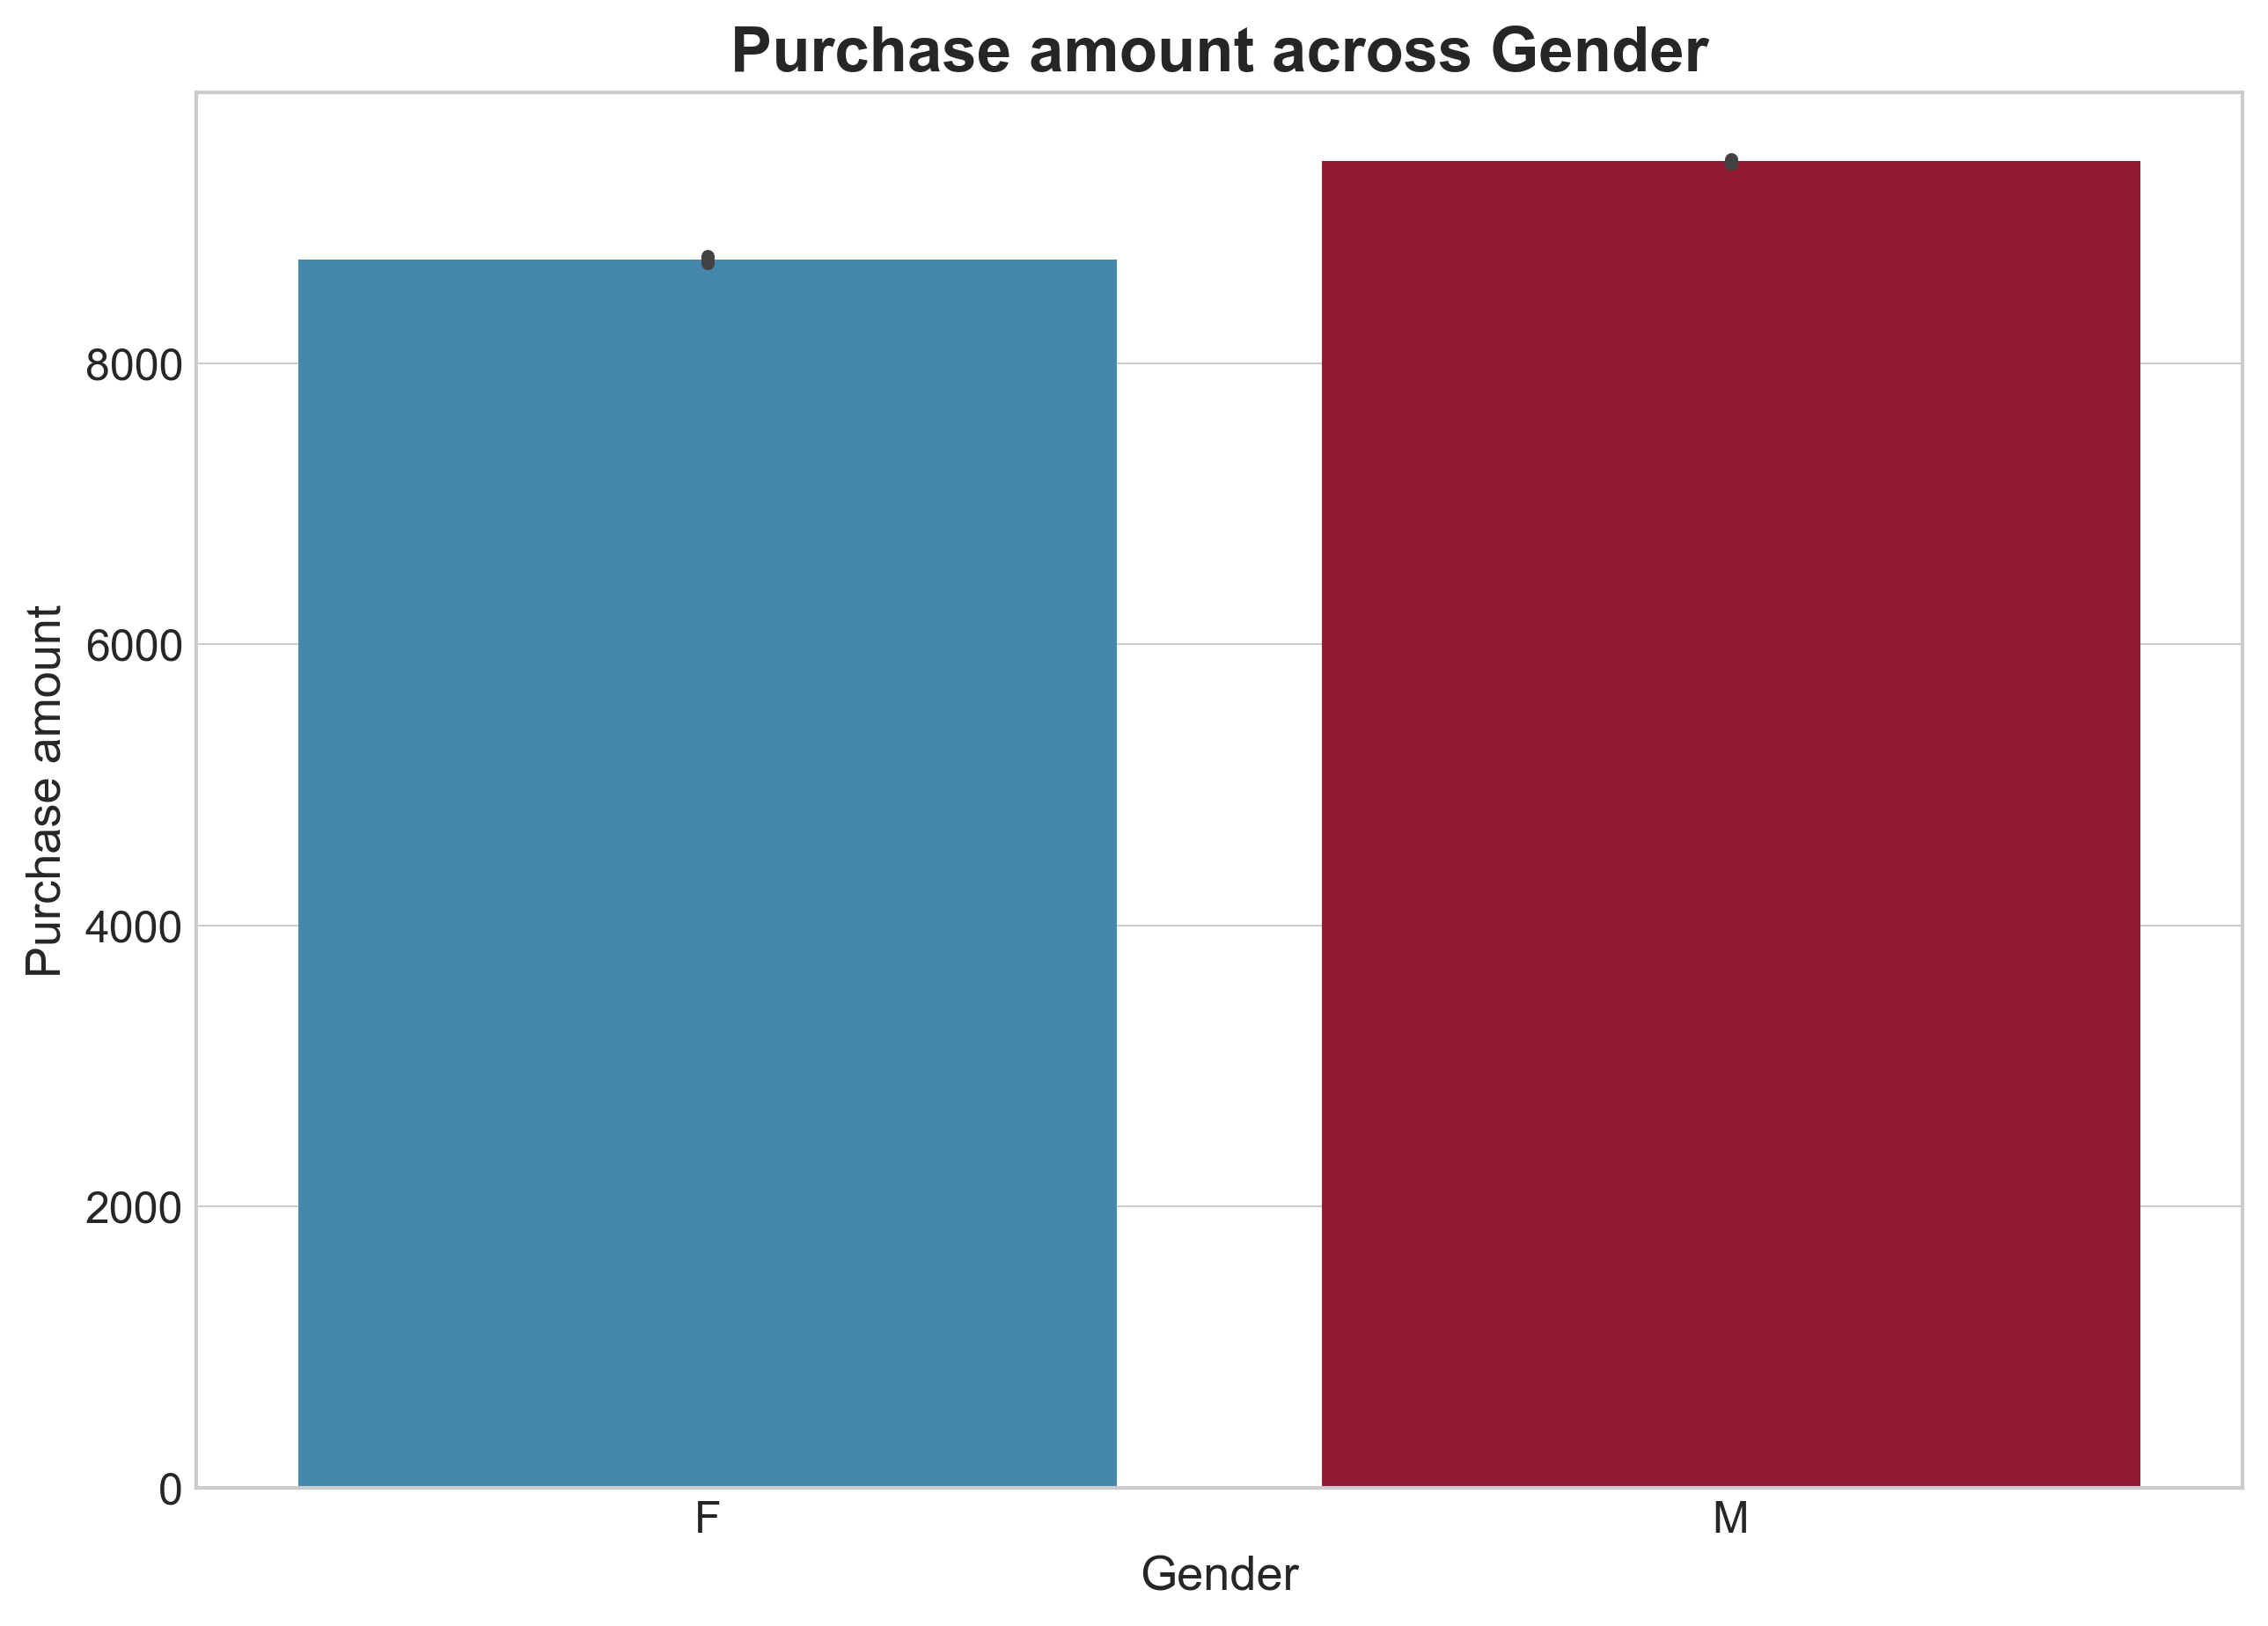

In [25]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7) , dpi = 300)
sns.barplot(x = df['Gender'],y= df['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontsize' : 17, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontsize' : 13})
plt.ylabel('Purchase amount', fontdict = {'fontsize' : 13})
plt.tick_params(labelsize = 12)
plt.show()

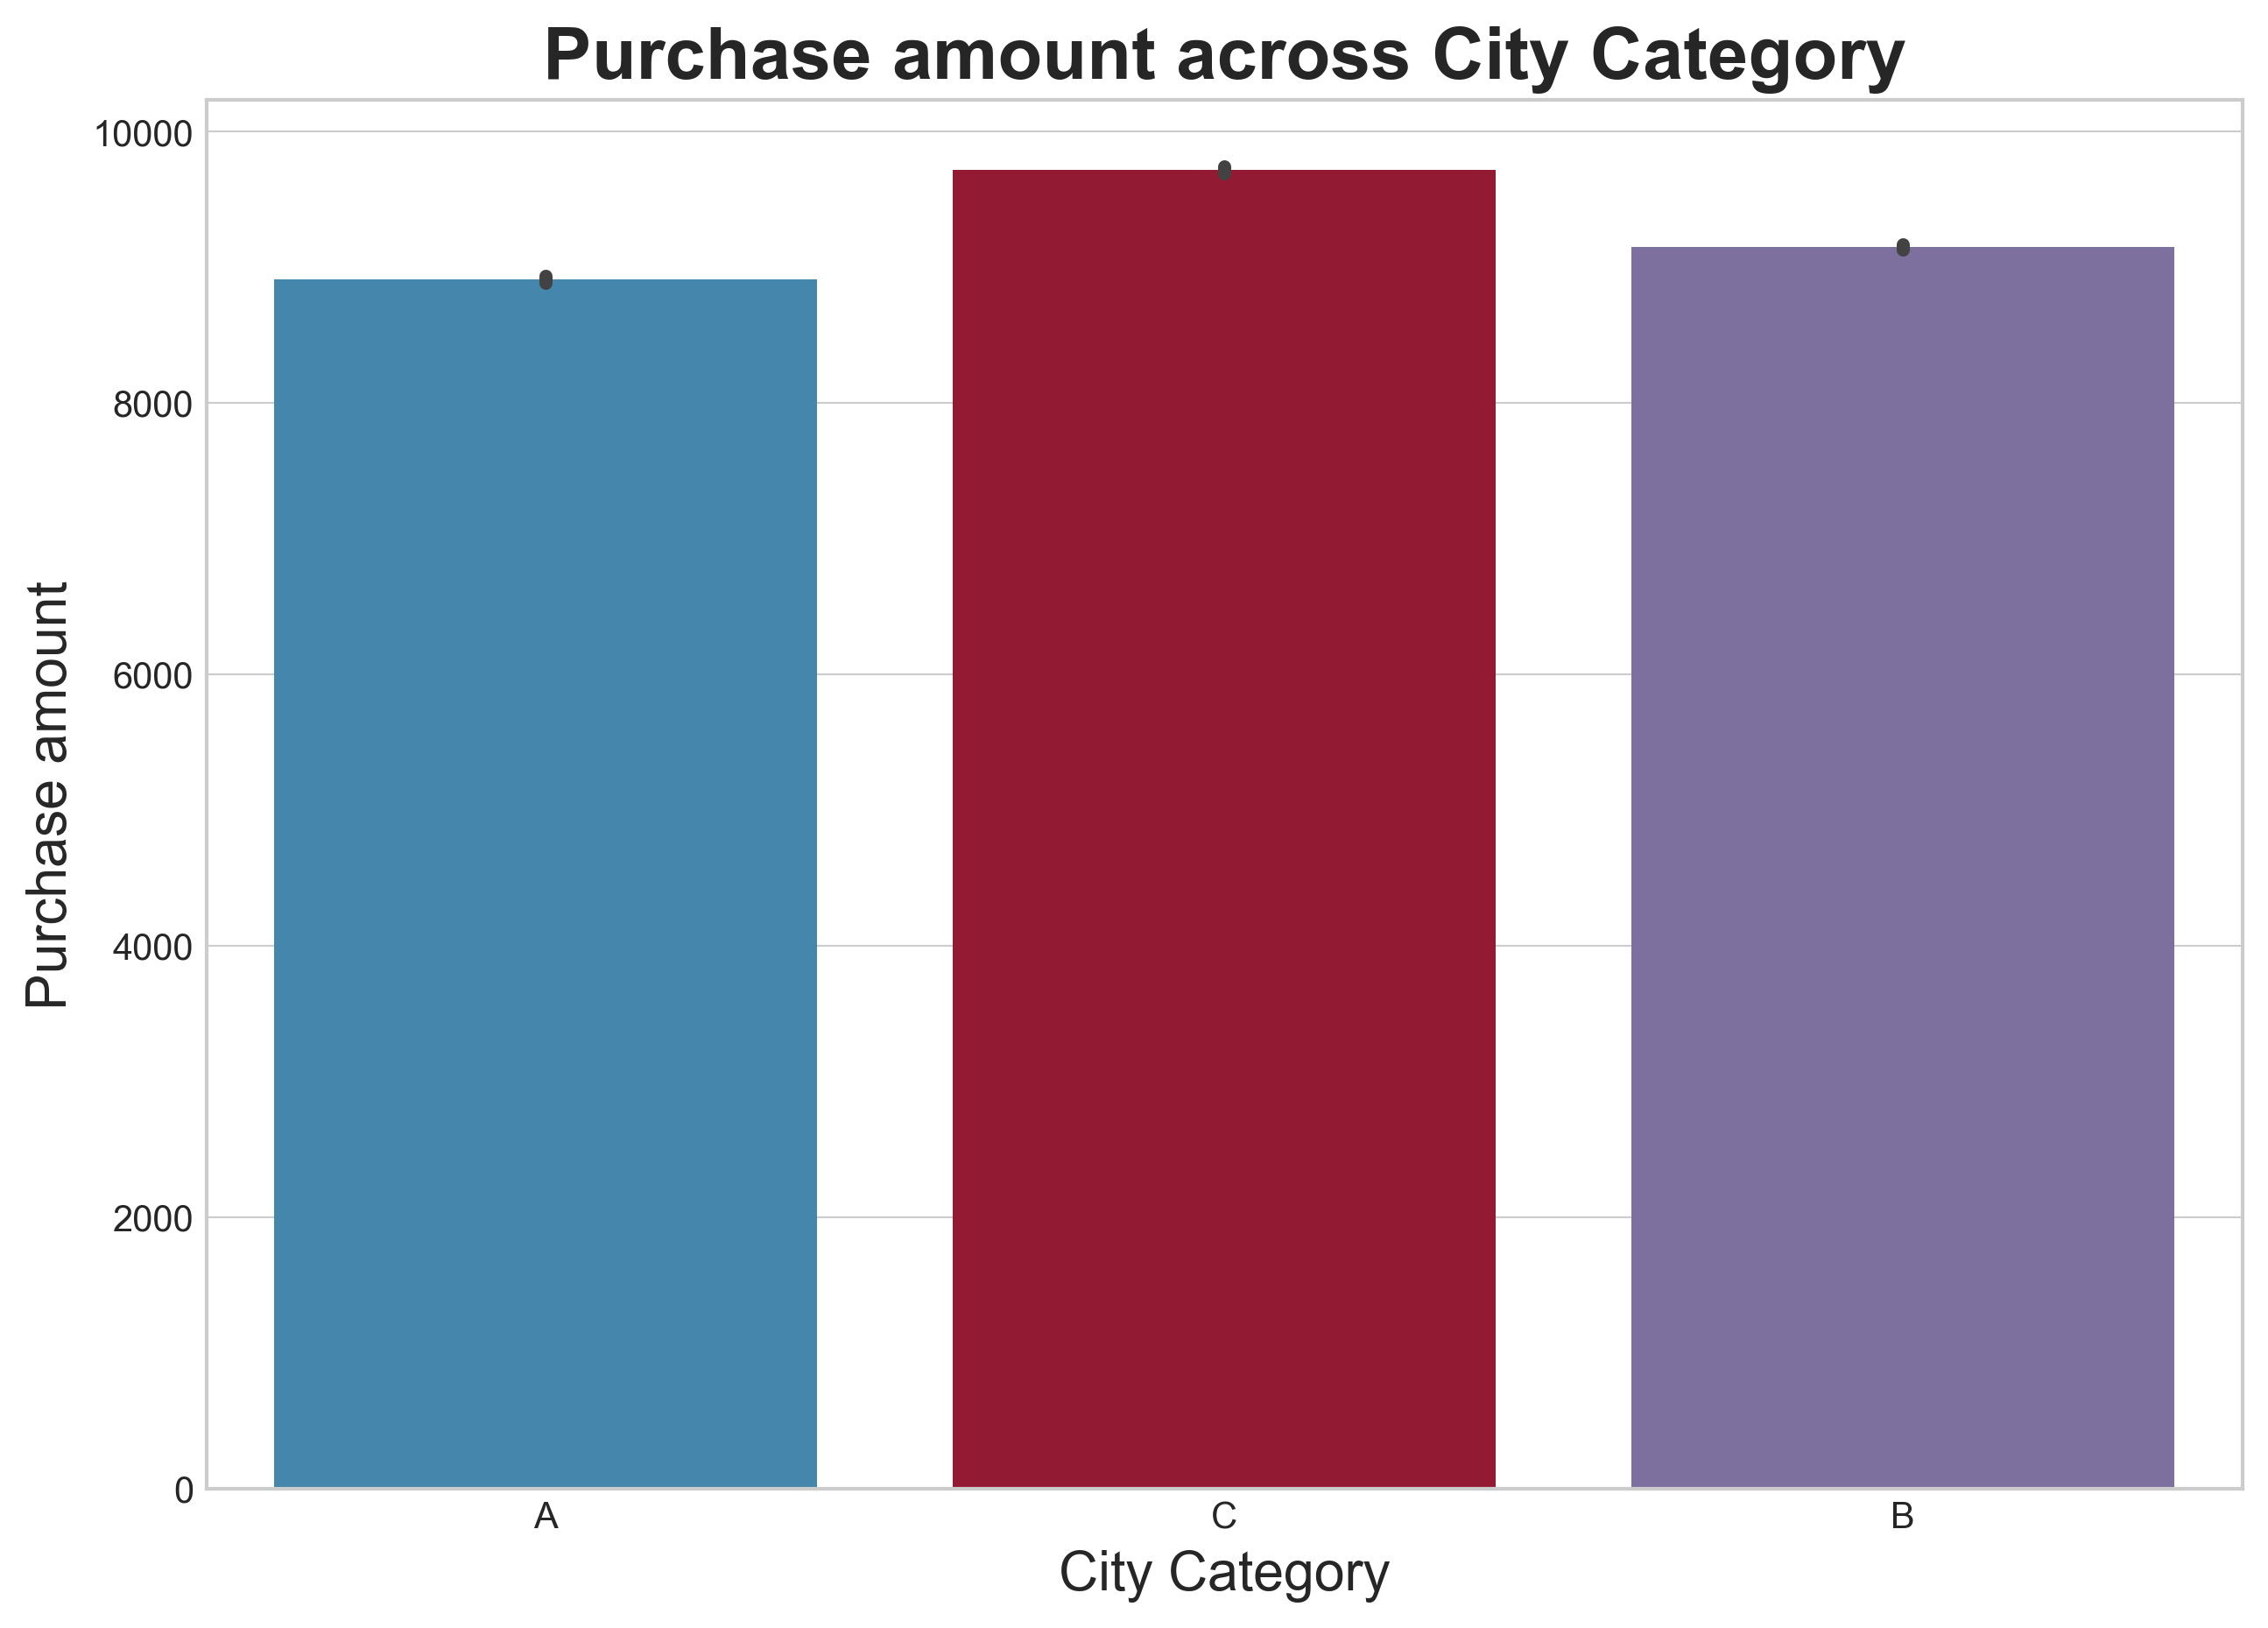

In [26]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7),dpi = 300)
sns.barplot(x= df['City_Category'],y =  df['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()


We observe had observe that customers from City of Category B had registered the highest number of purchases, but the customers from the City of Category C spends the most.

In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


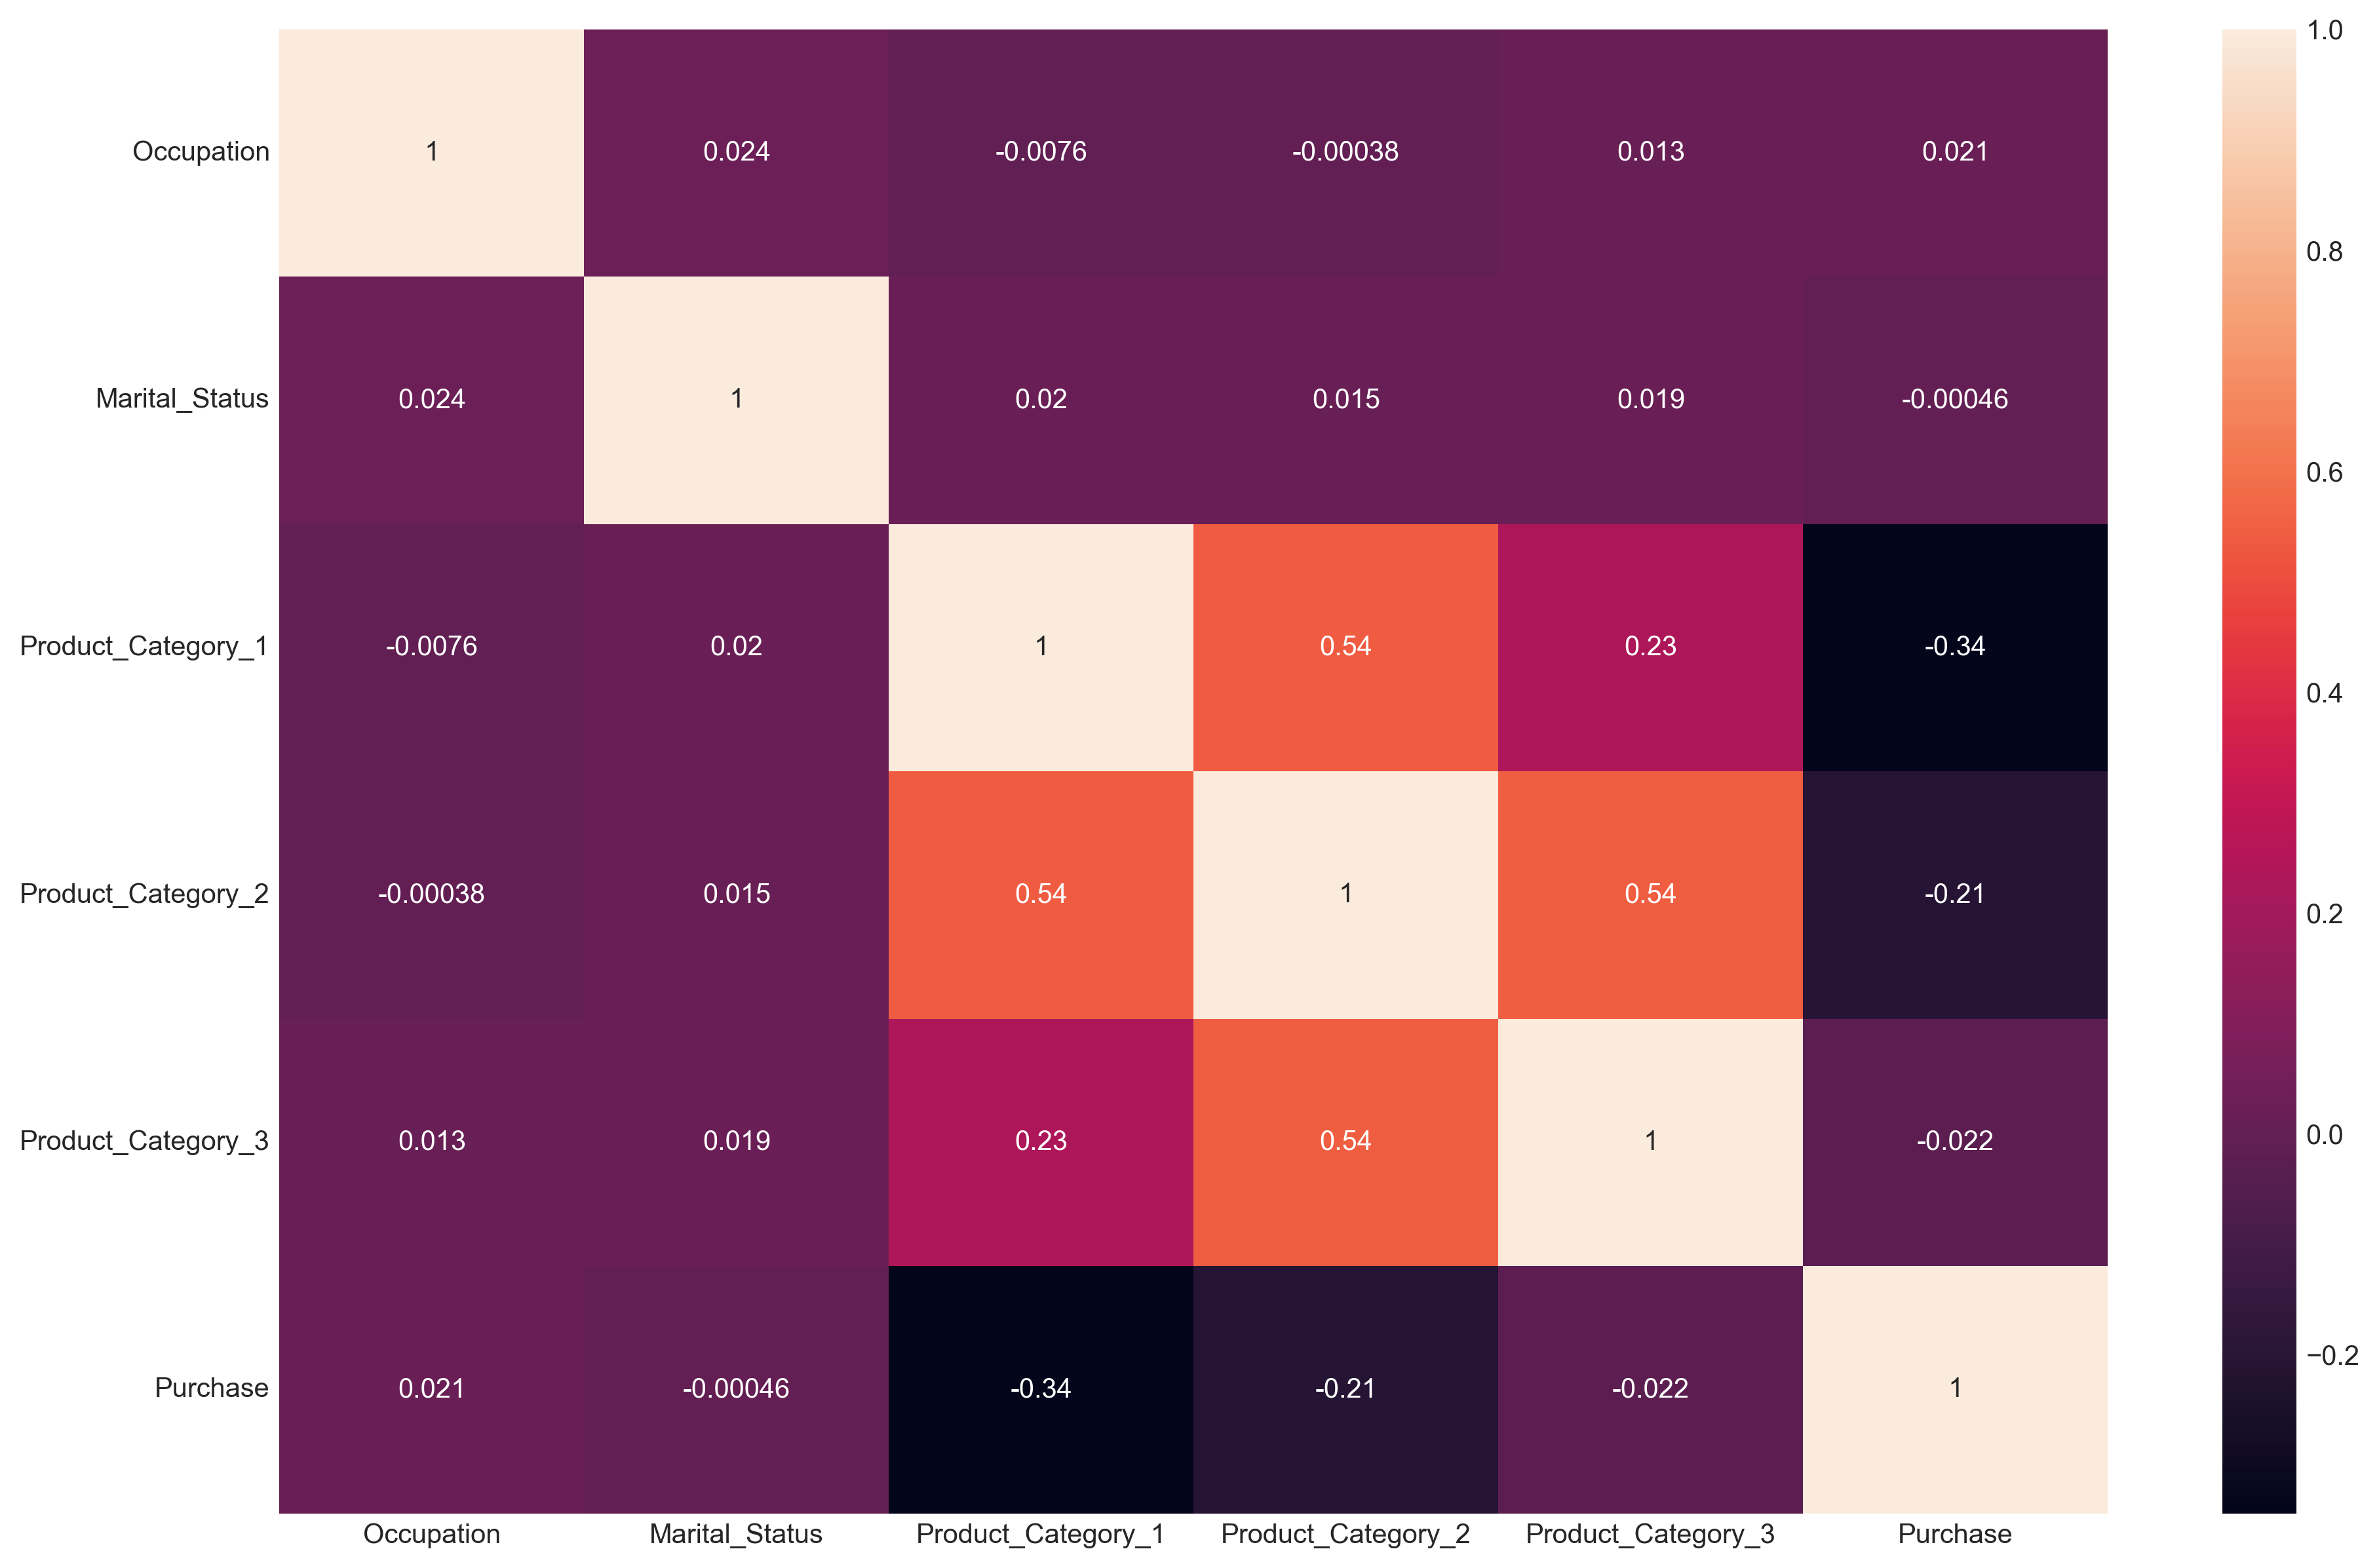

In [30]:
# Creating a heatmap of correlation matrix
plt.figure(figsize = (15,10), dpi = 300)
sns.heatmap(df.corr(), annot = True)
plt.show()

We observe that there is no multicollinearity with our predictors, although there is some correlation among the product categories as the feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'. 